In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.rcParams['agg.path.chunksize'] = 10000

In [2]:
df = pd.read_csv('train.csv',index_col=0)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df.head()

,signal,open_channels
time,,
0.0001,-2.7600,0
0.0002,-2.8557,0
0.0003,-2.4074,0
0.0004,-3.1404,0
0.0005,-3.1525,0


In [4]:
df.tail()

,signal,open_channels
time,,
499.9996,2.9194,7
499.9997,2.6980,7
499.9998,4.5164,8
499.9999,5.6397,9
500.0000,5.3792,9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5000000 entries, 0.0001 to 500.0
Data columns (total 2 columns):
signal           float64
open_channels    int64
dtypes: float64(1), int64(1)
memory usage: 114.4 MB


In [6]:
df.index.values[-1]

500.0

In [10]:
df_terminus = df.index.values[-1]
batches = int(df_terminus/50)
seconds_in_batch = 50
freq = 10000

print(batches)

10


In [11]:
base = np.array([])
for batch in range(batches):
    mini_array = np.ones(50*10000)*batch
    base = np.append(base,mini_array)
print(len(base))

5000000


In [12]:
base

array([0., 0., 0., ..., 9., 9., 9.])

In [13]:
df['batch'] = base
df['batch'] = df['batch'].astype('int')

In [10]:
df.head()

,signal,open_channels,batch
time,,,
0.0001,-2.7600,0,0
0.0002,-2.8557,0,0
0.0003,-2.4074,0,0
0.0004,-3.1404,0,0
0.0005,-3.1525,0,0


In [34]:
df.loc[0.0001]

signal          -2.76
open_channels    0.00
batch            0.00
Name: 0.0001, dtype: float64

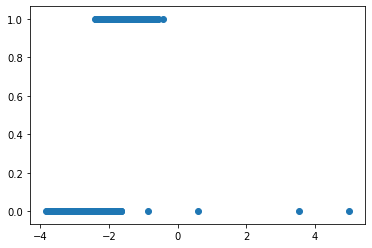

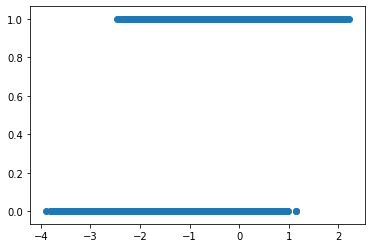

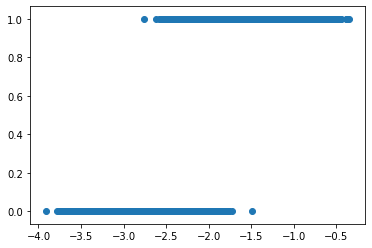

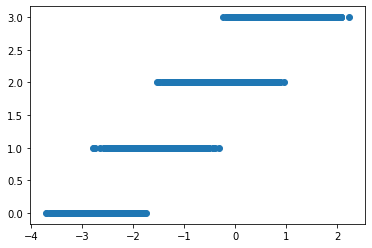

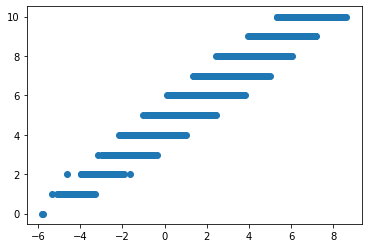

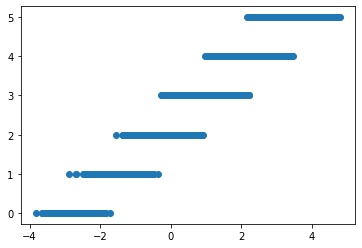

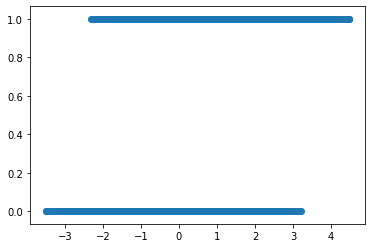

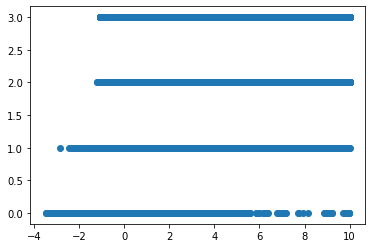

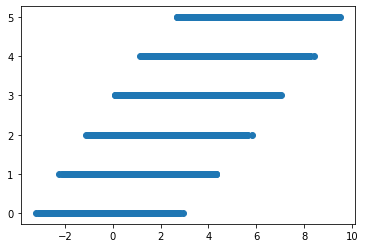

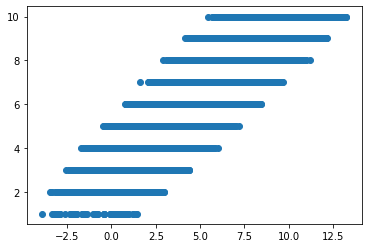

In [40]:
for batch_number in range(10):
    series = df[df.batch == batch_number].signal
    independent = df[df.batch == batch_number].open_channels
    plt.scatter(series,independent)
    plt.show()

"Note the correlation - more signal correlates positively with more ion channels open"

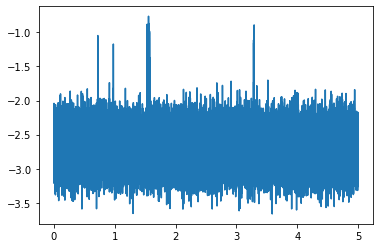

In [44]:
series = df[df.batch == 0].signal
plt.plot(series[:5])

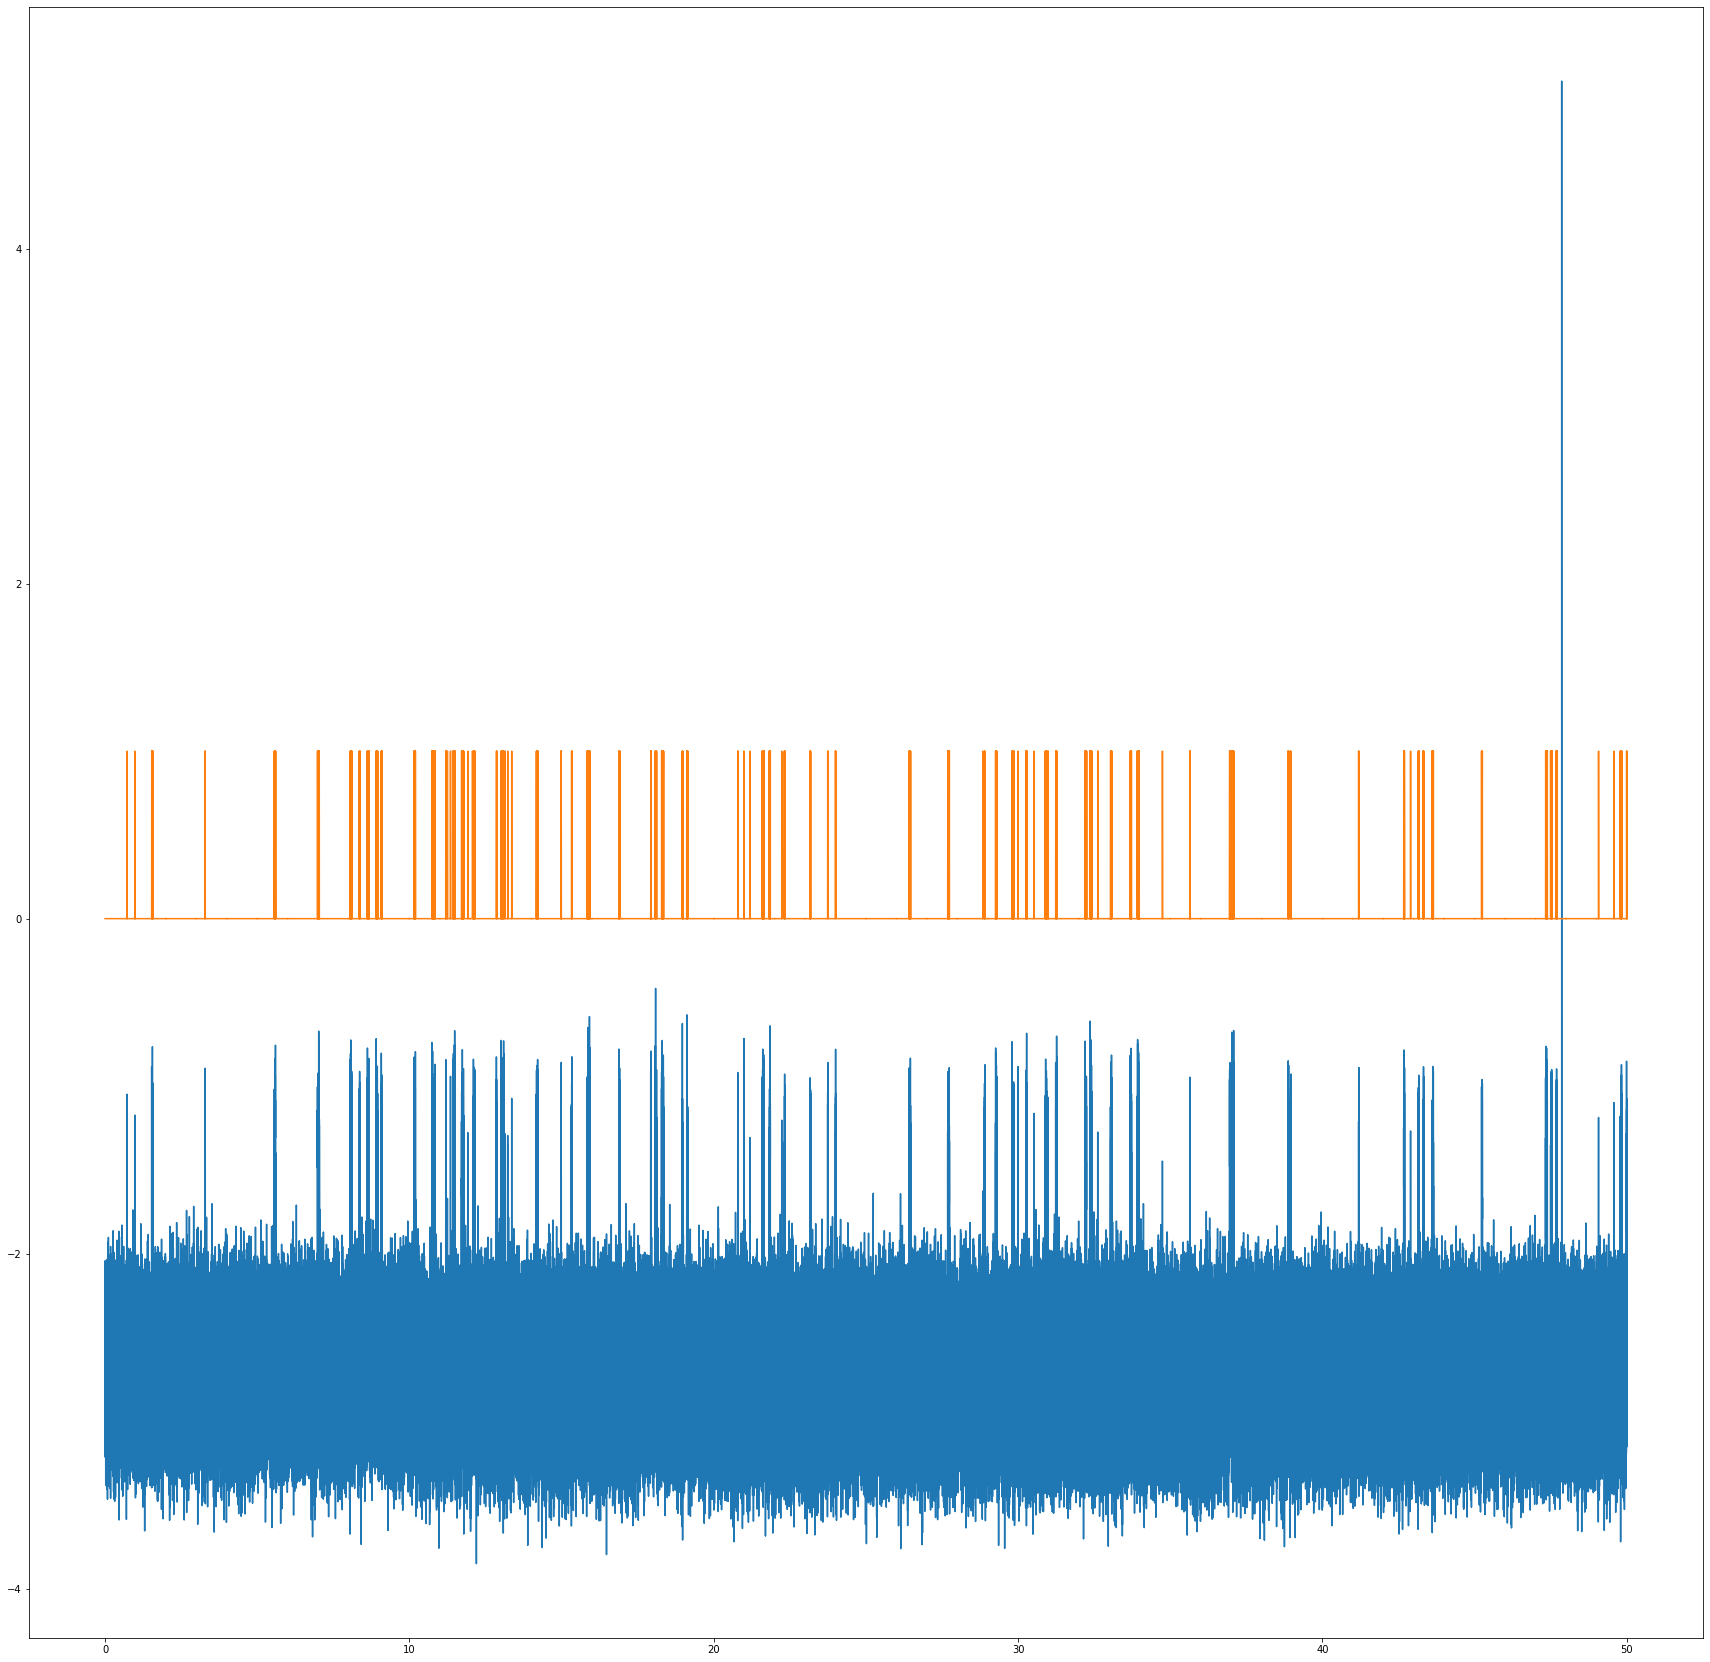

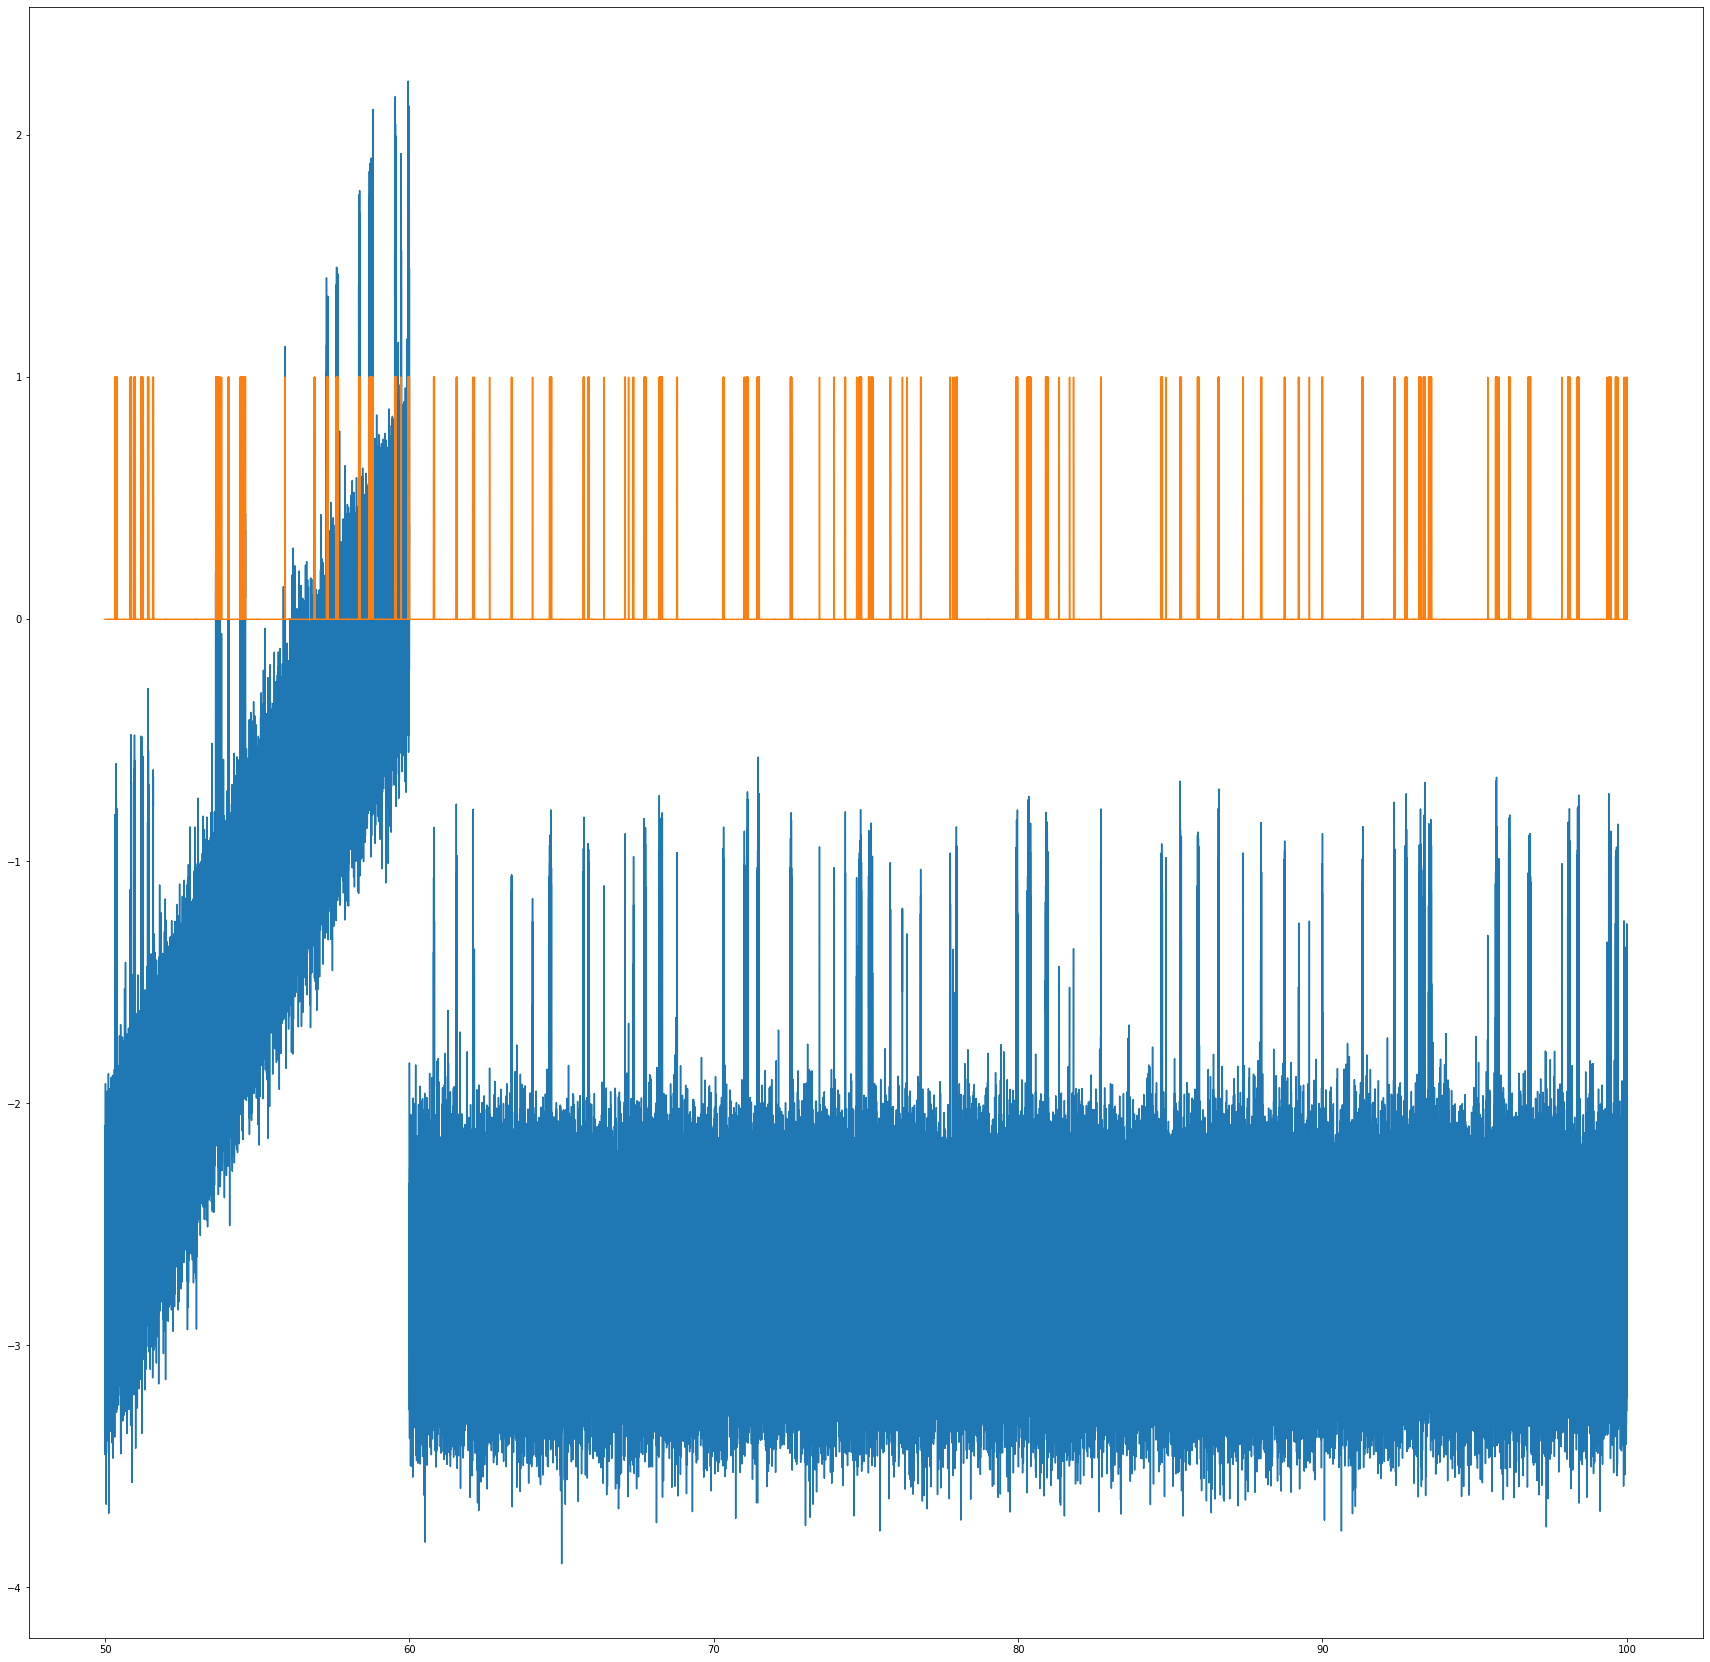

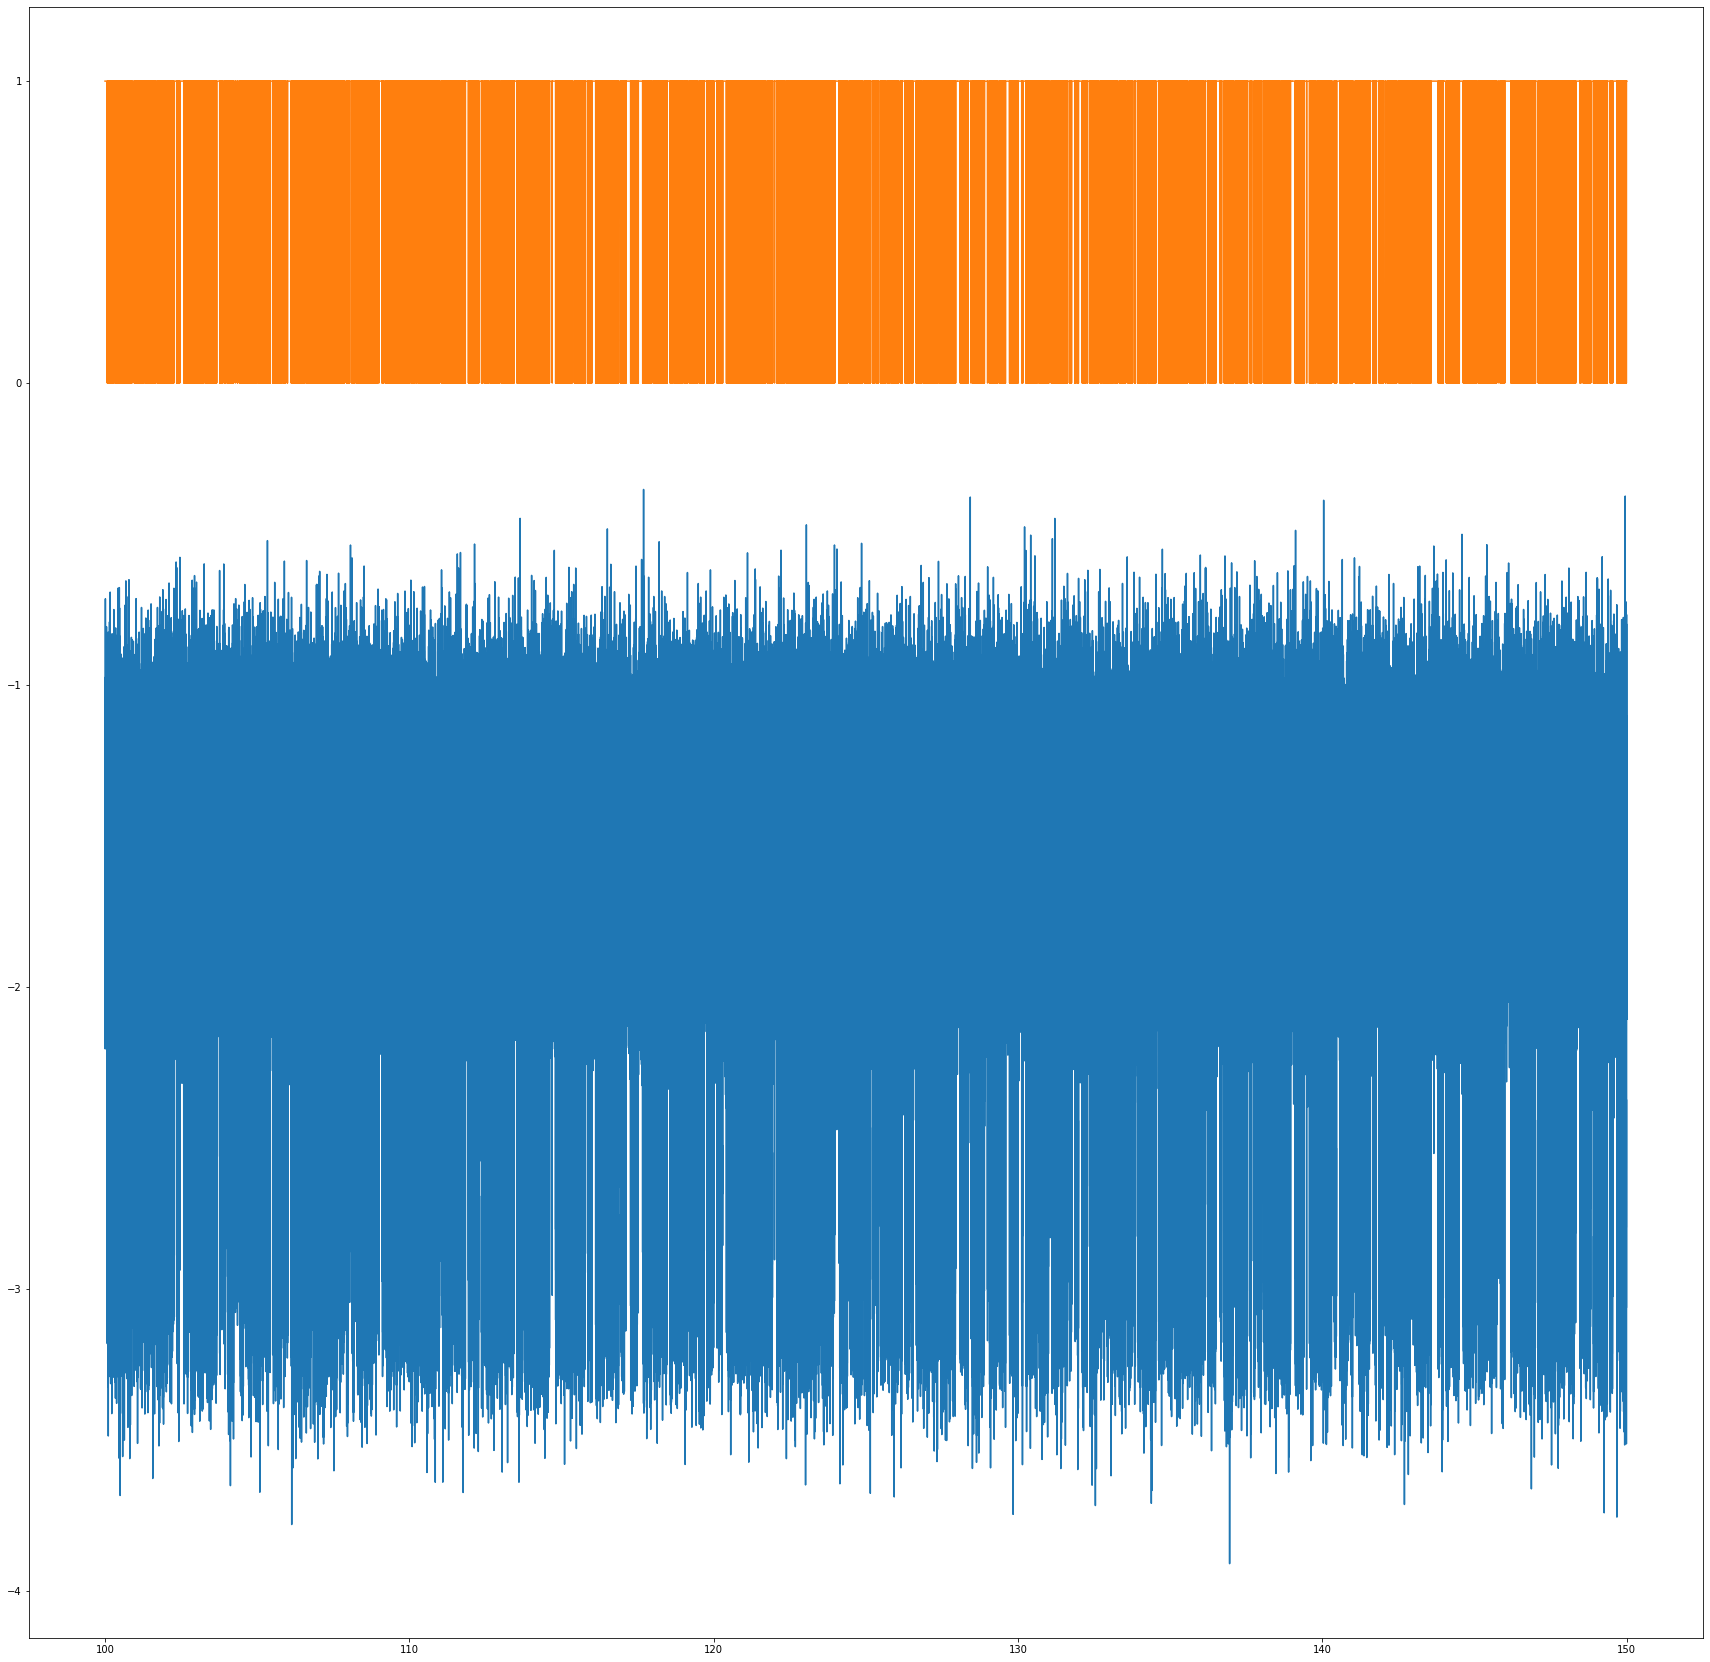

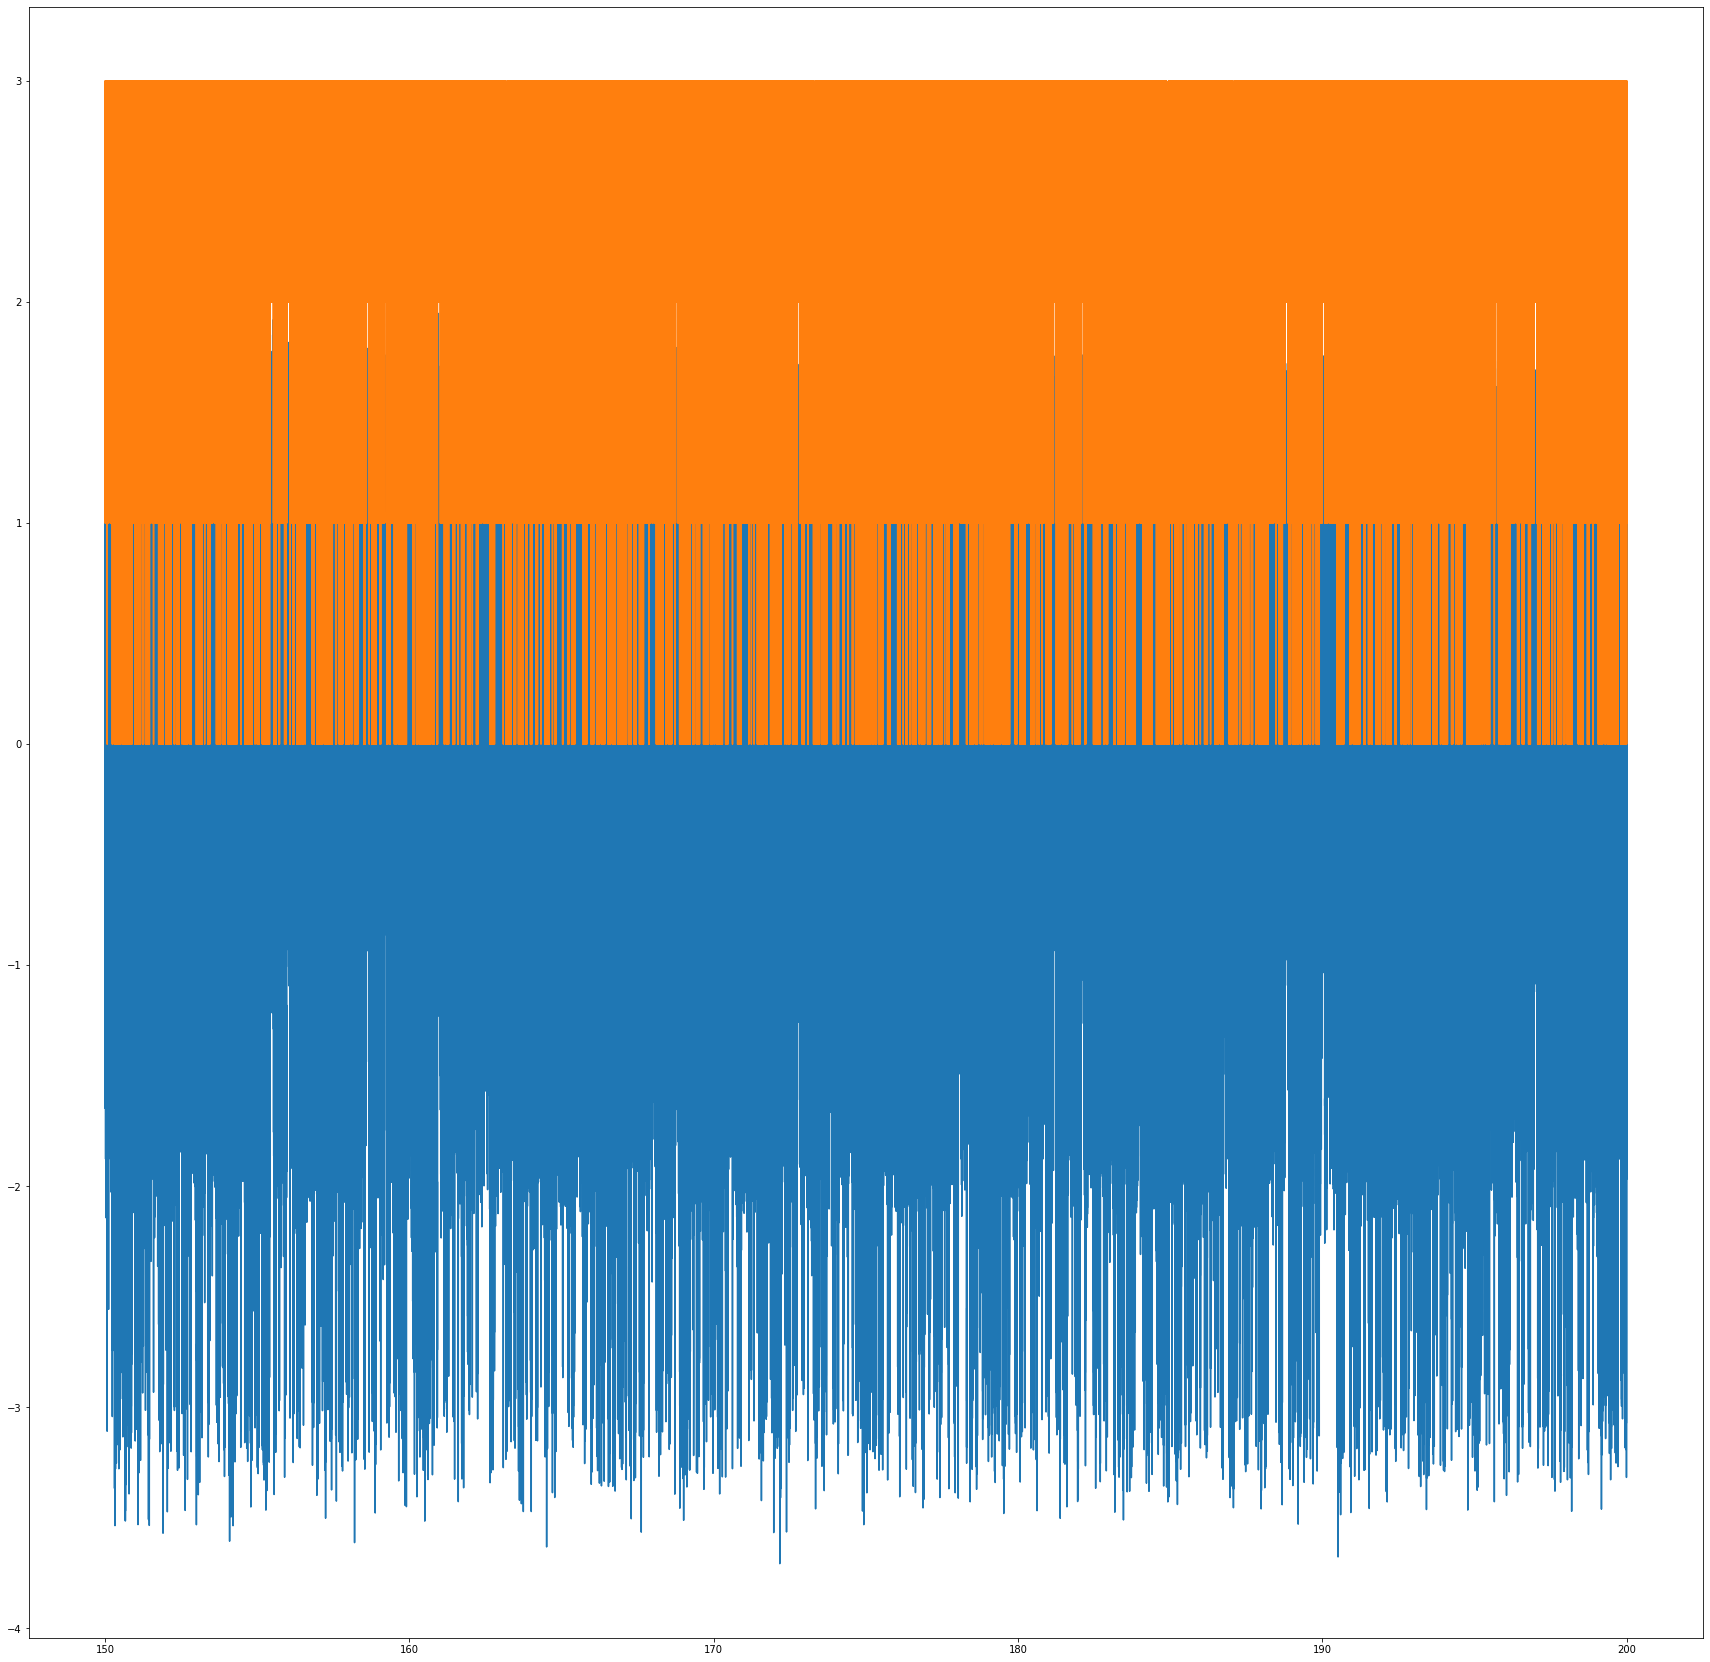

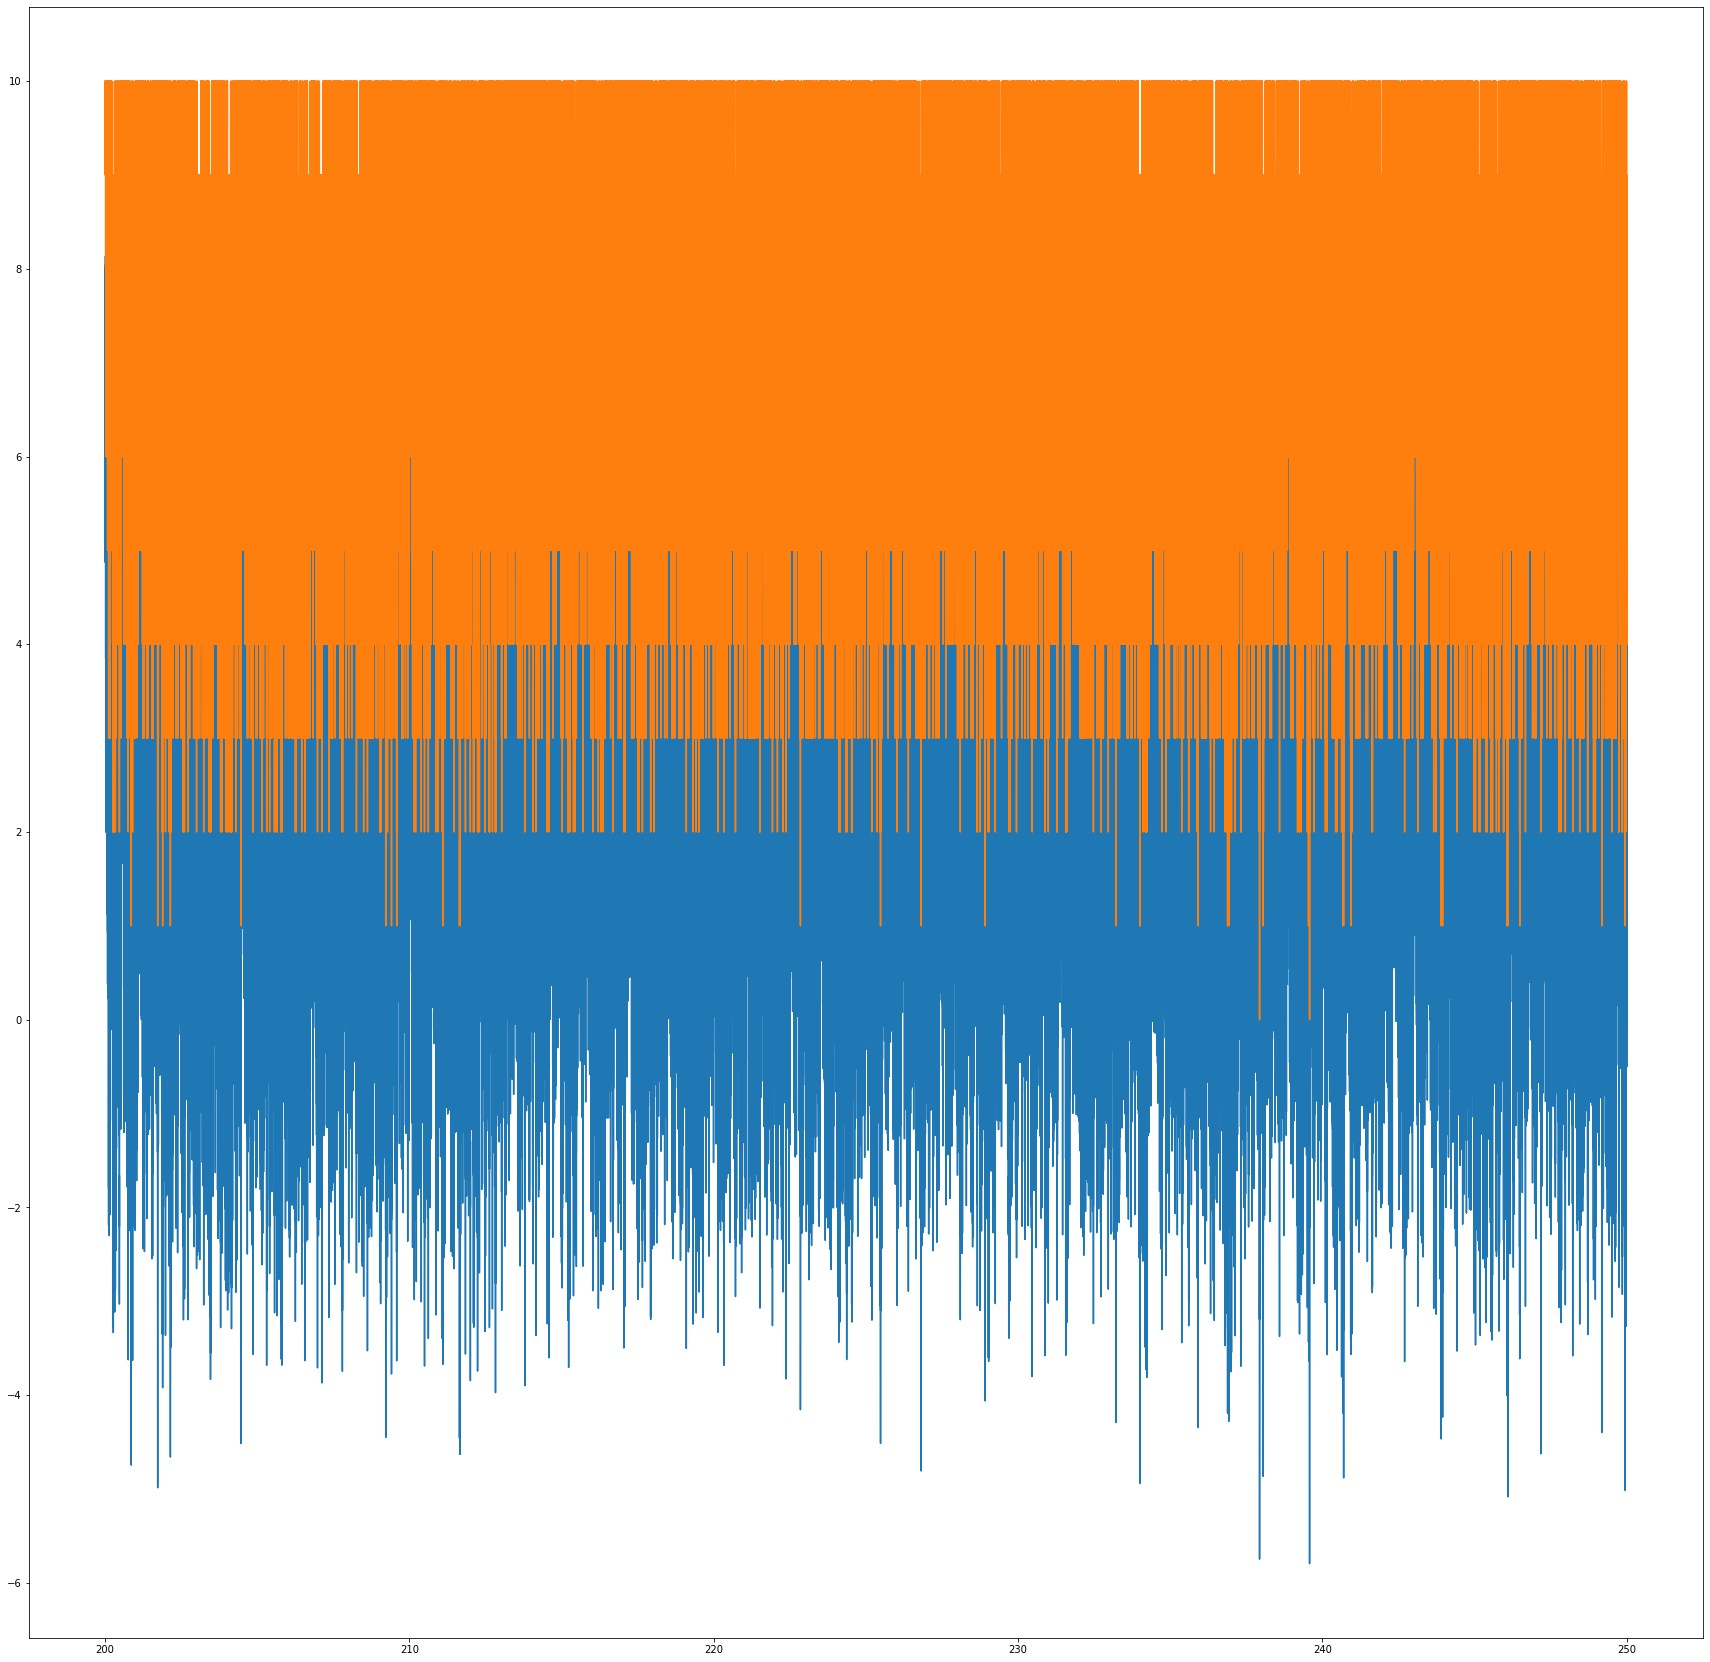

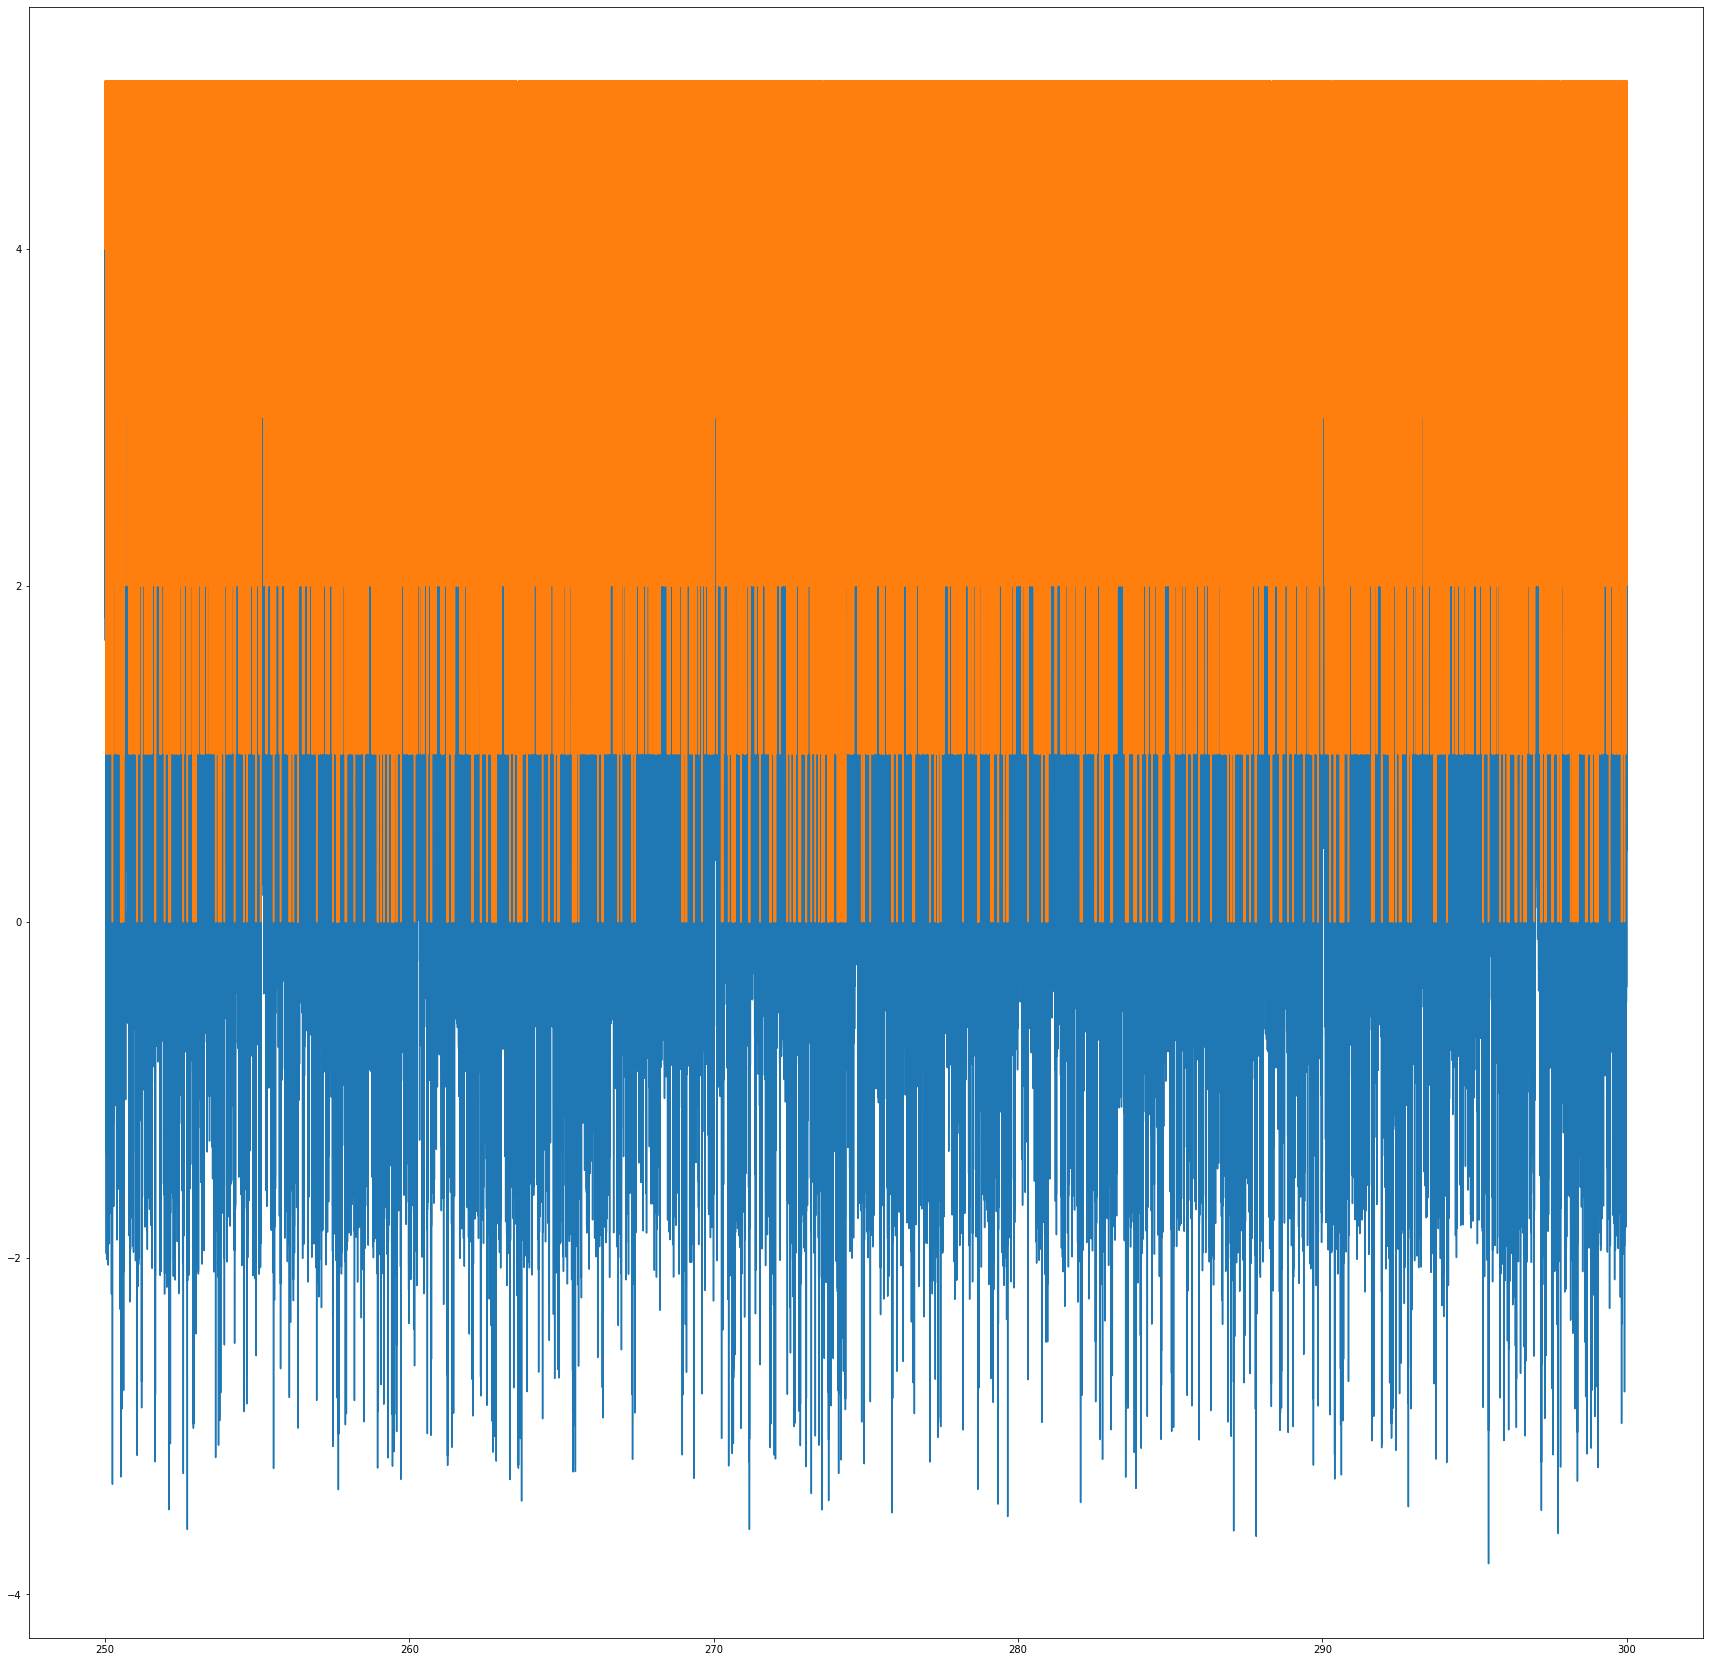

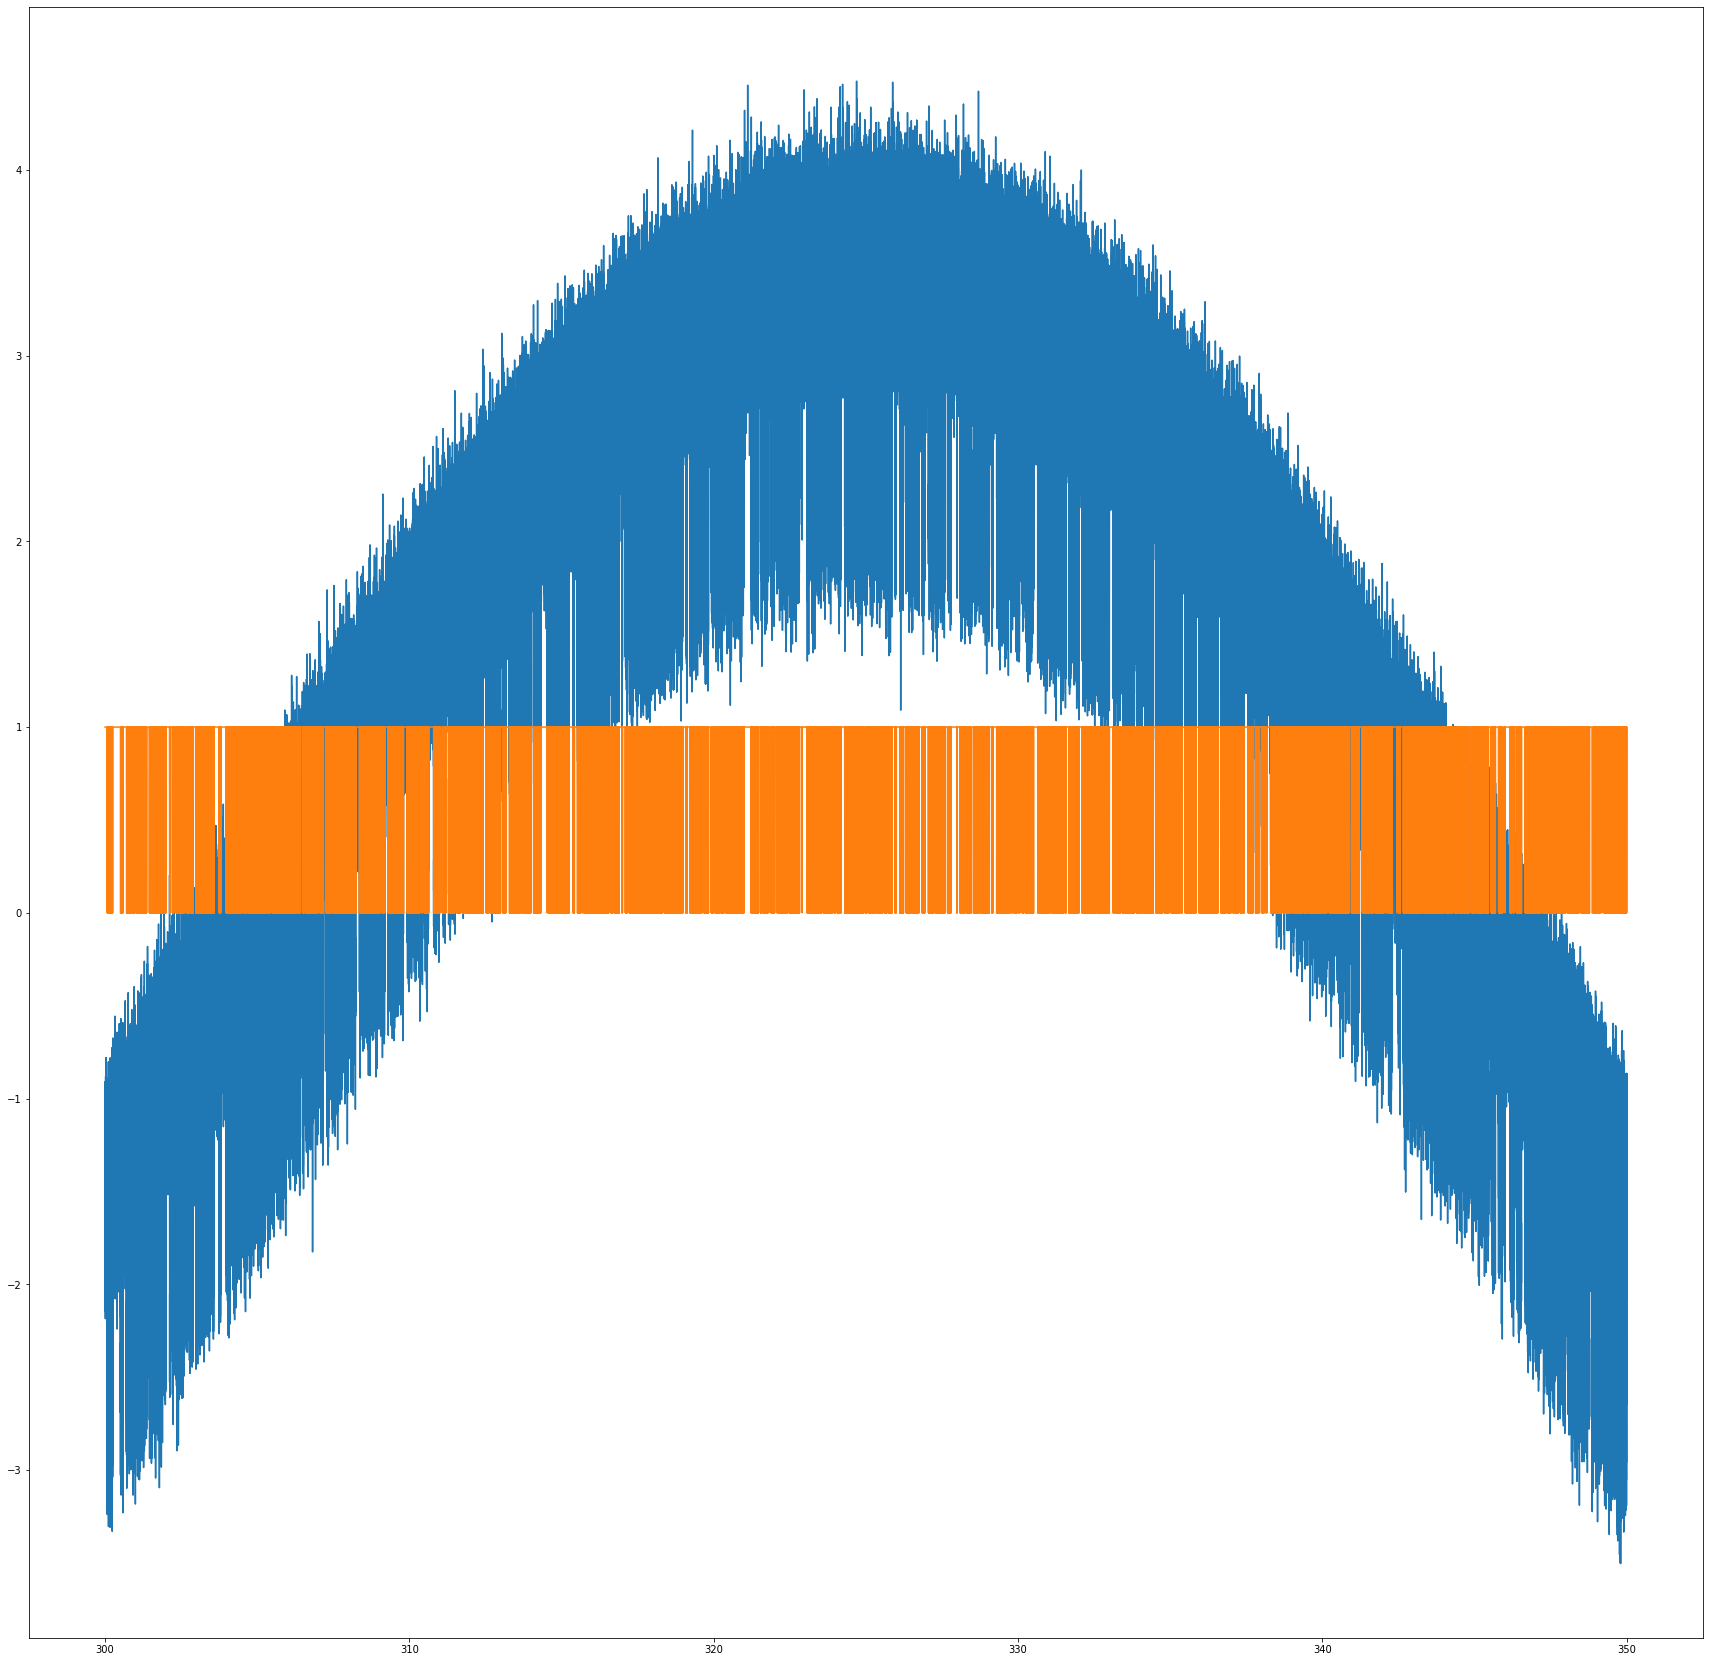

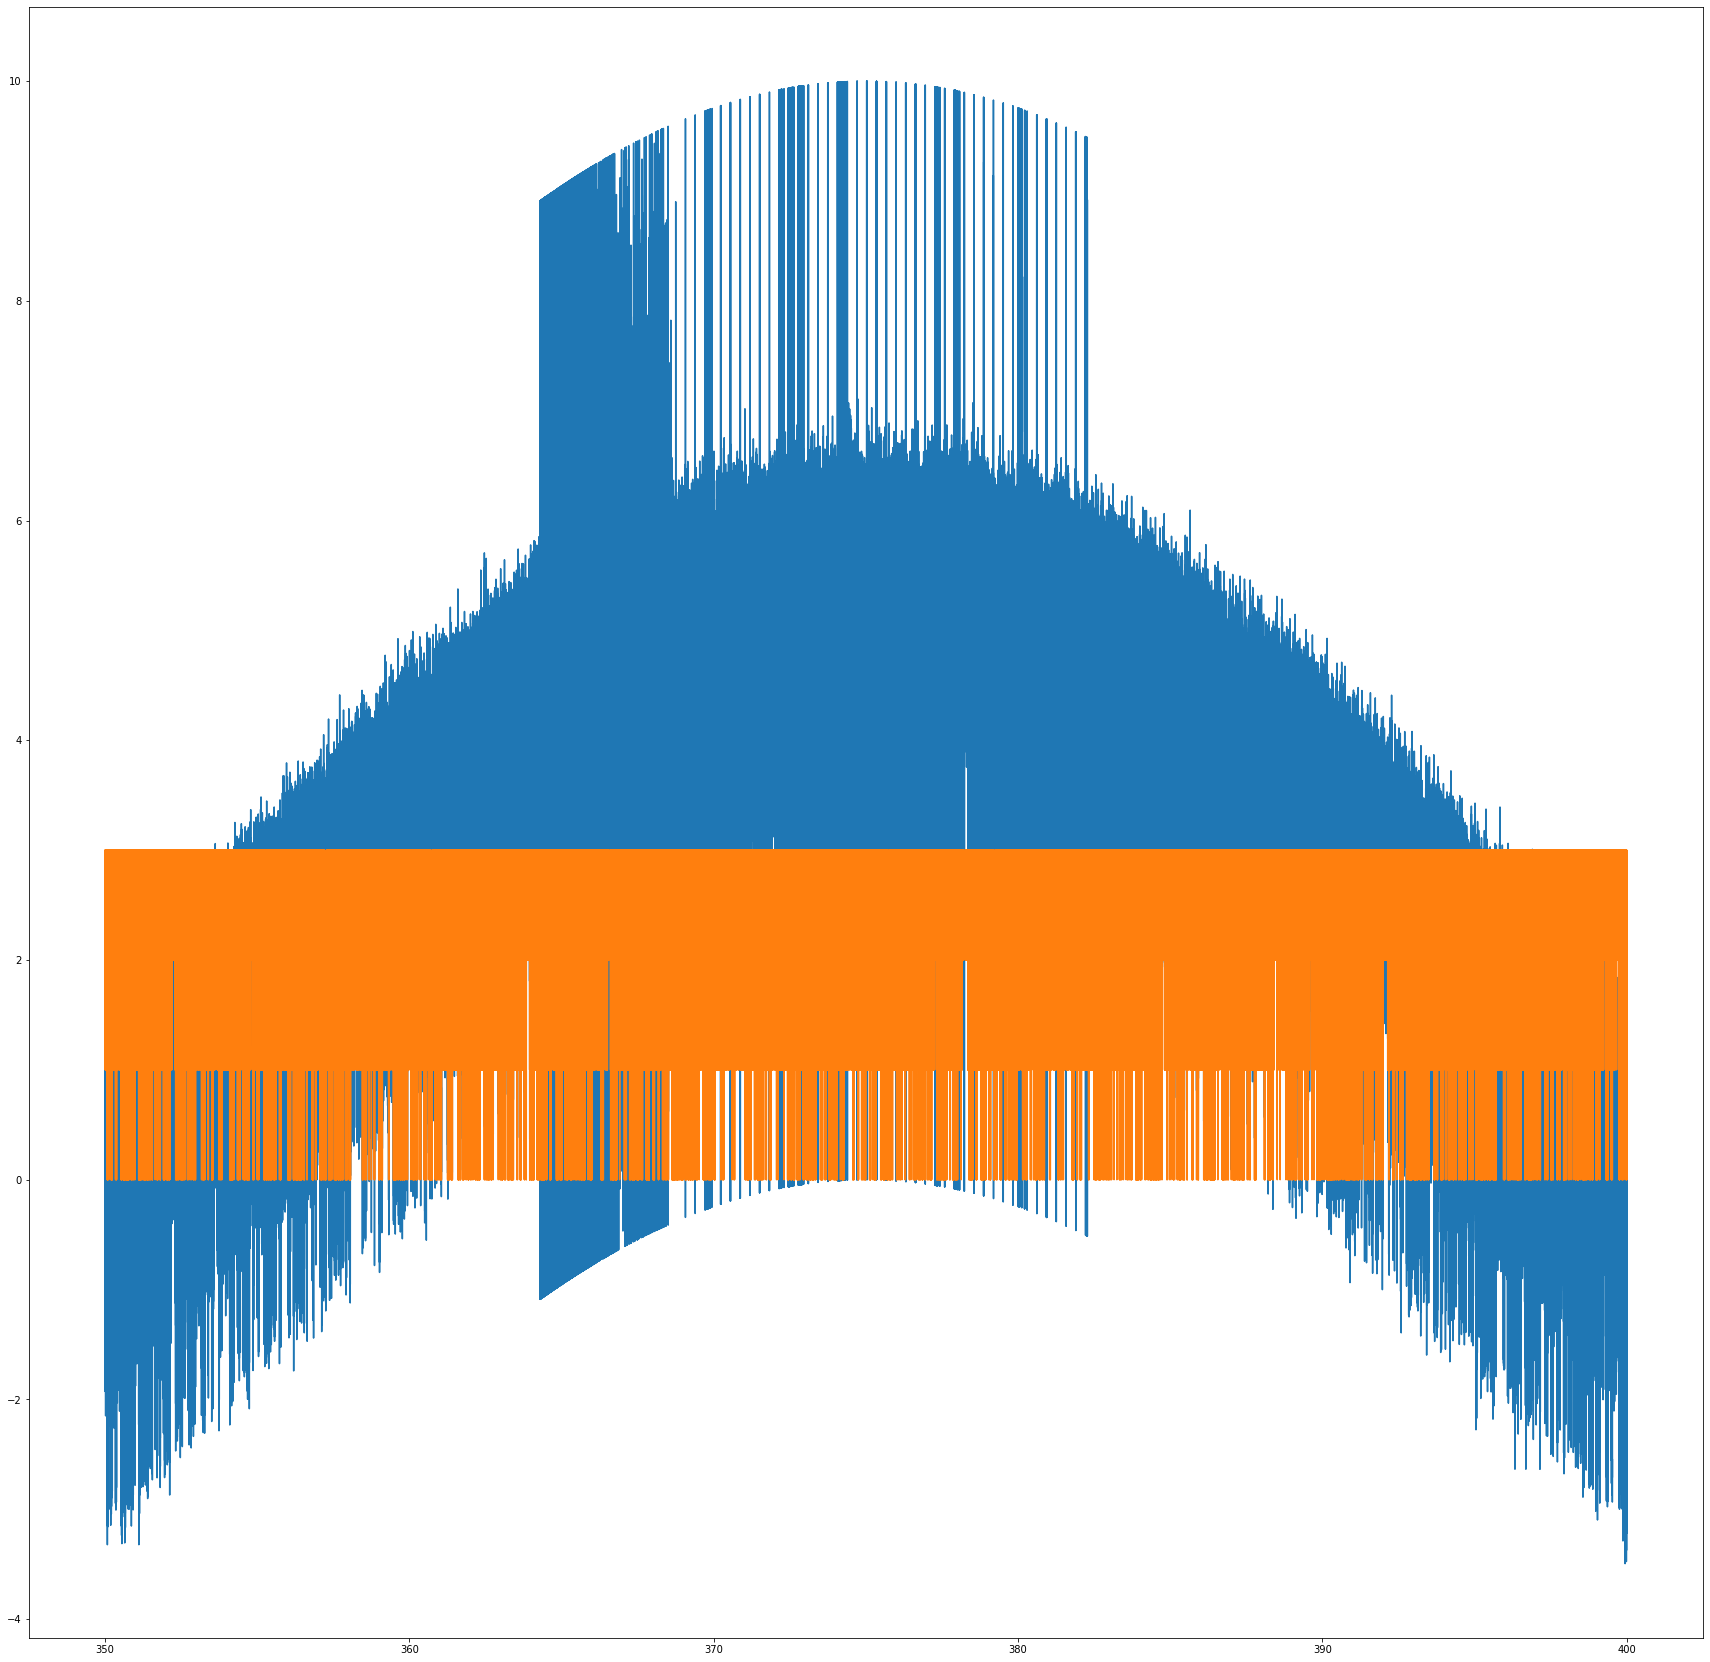

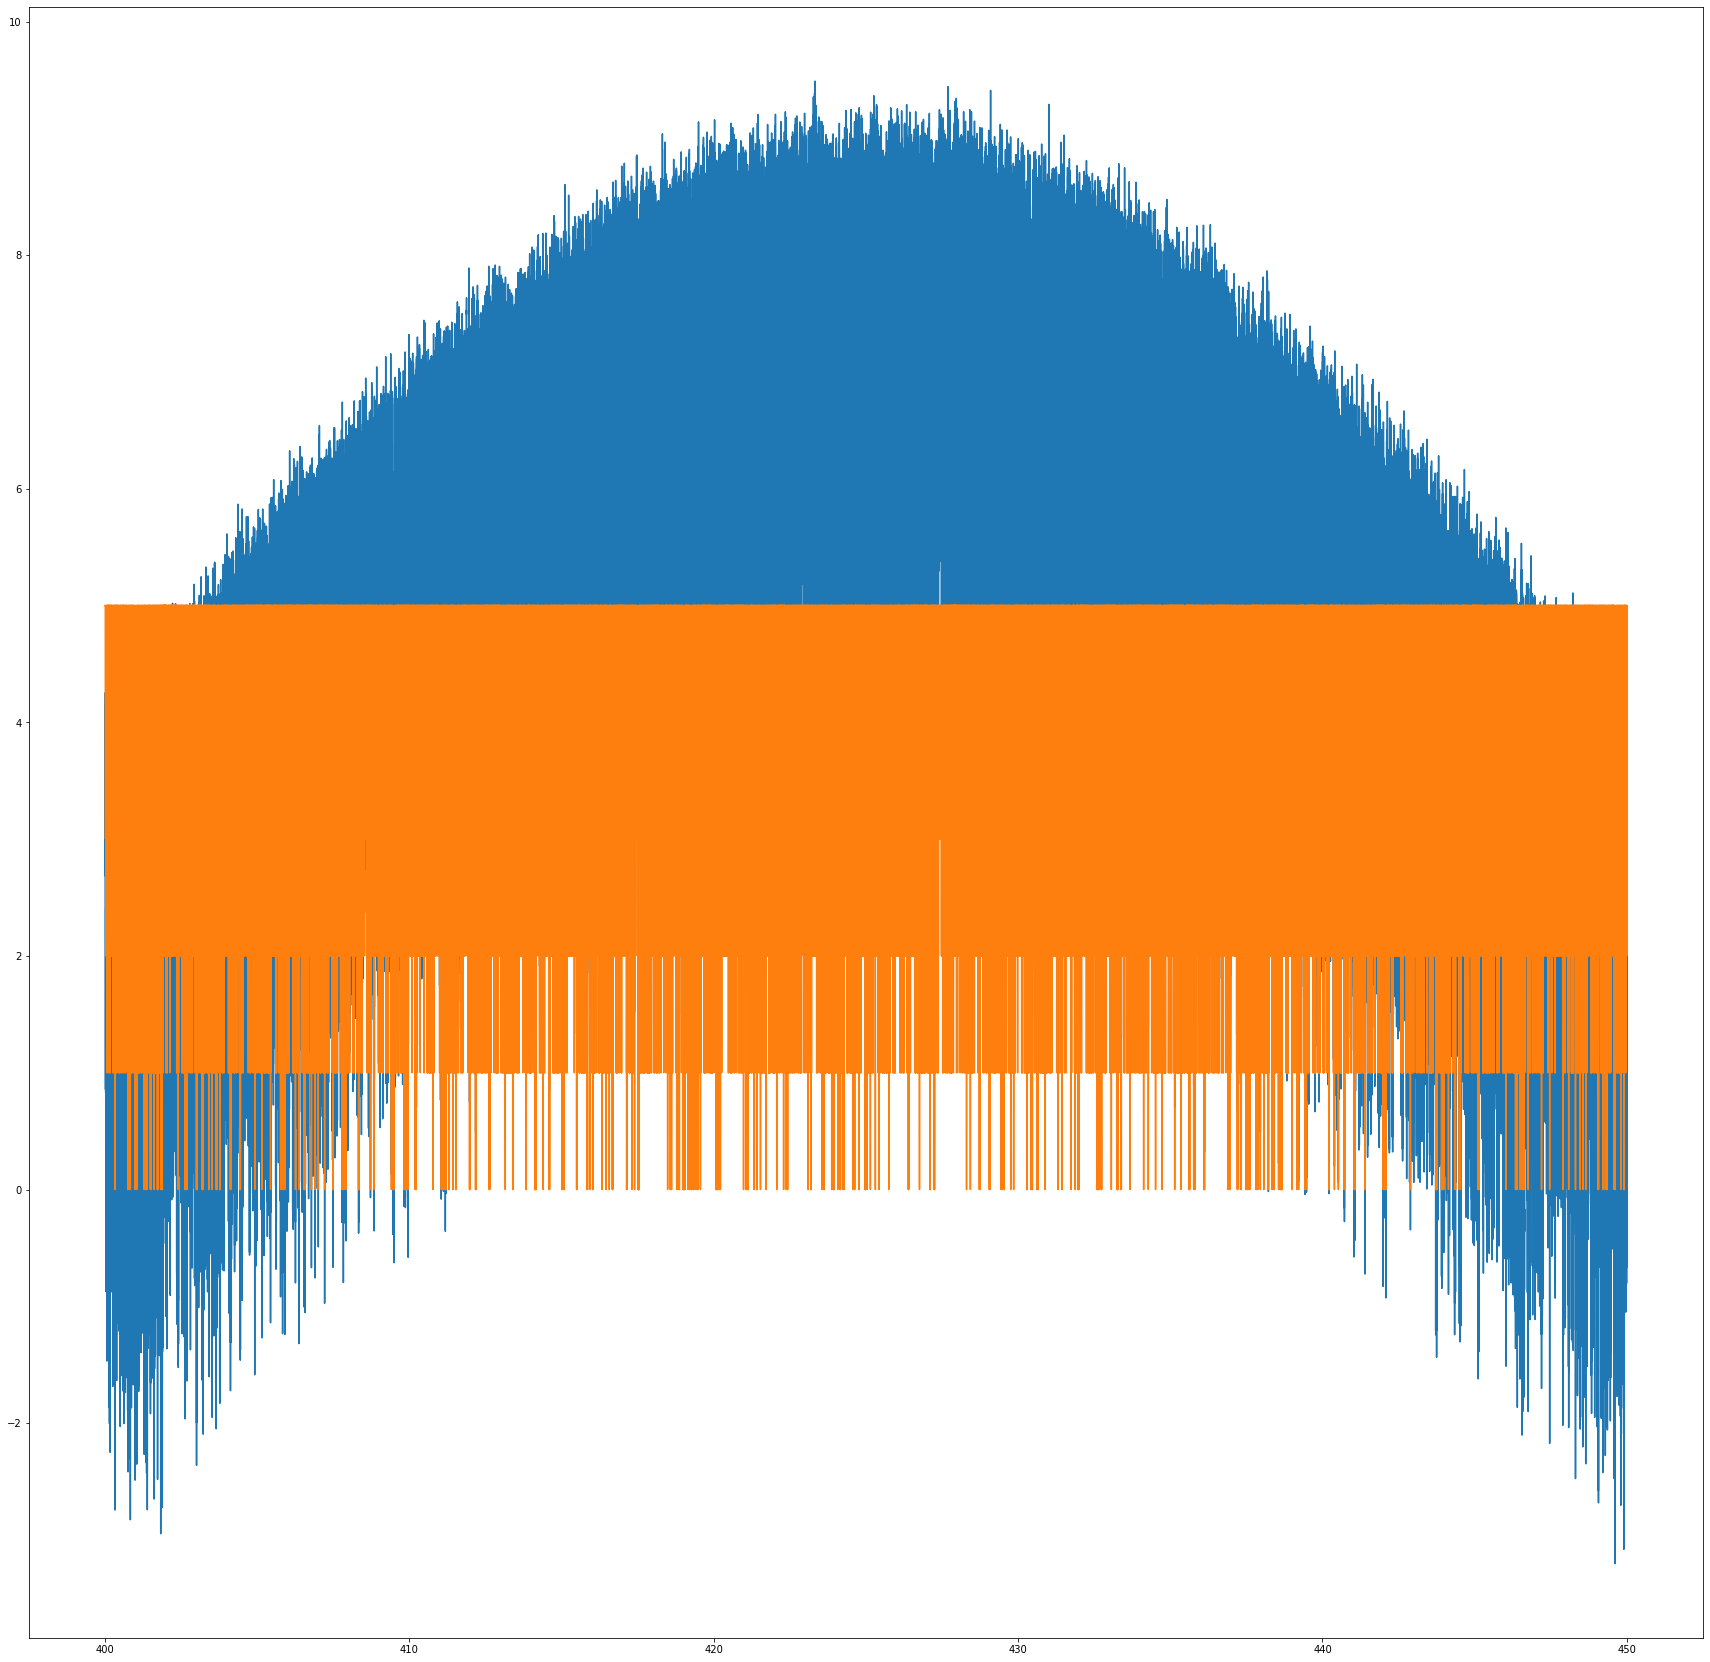

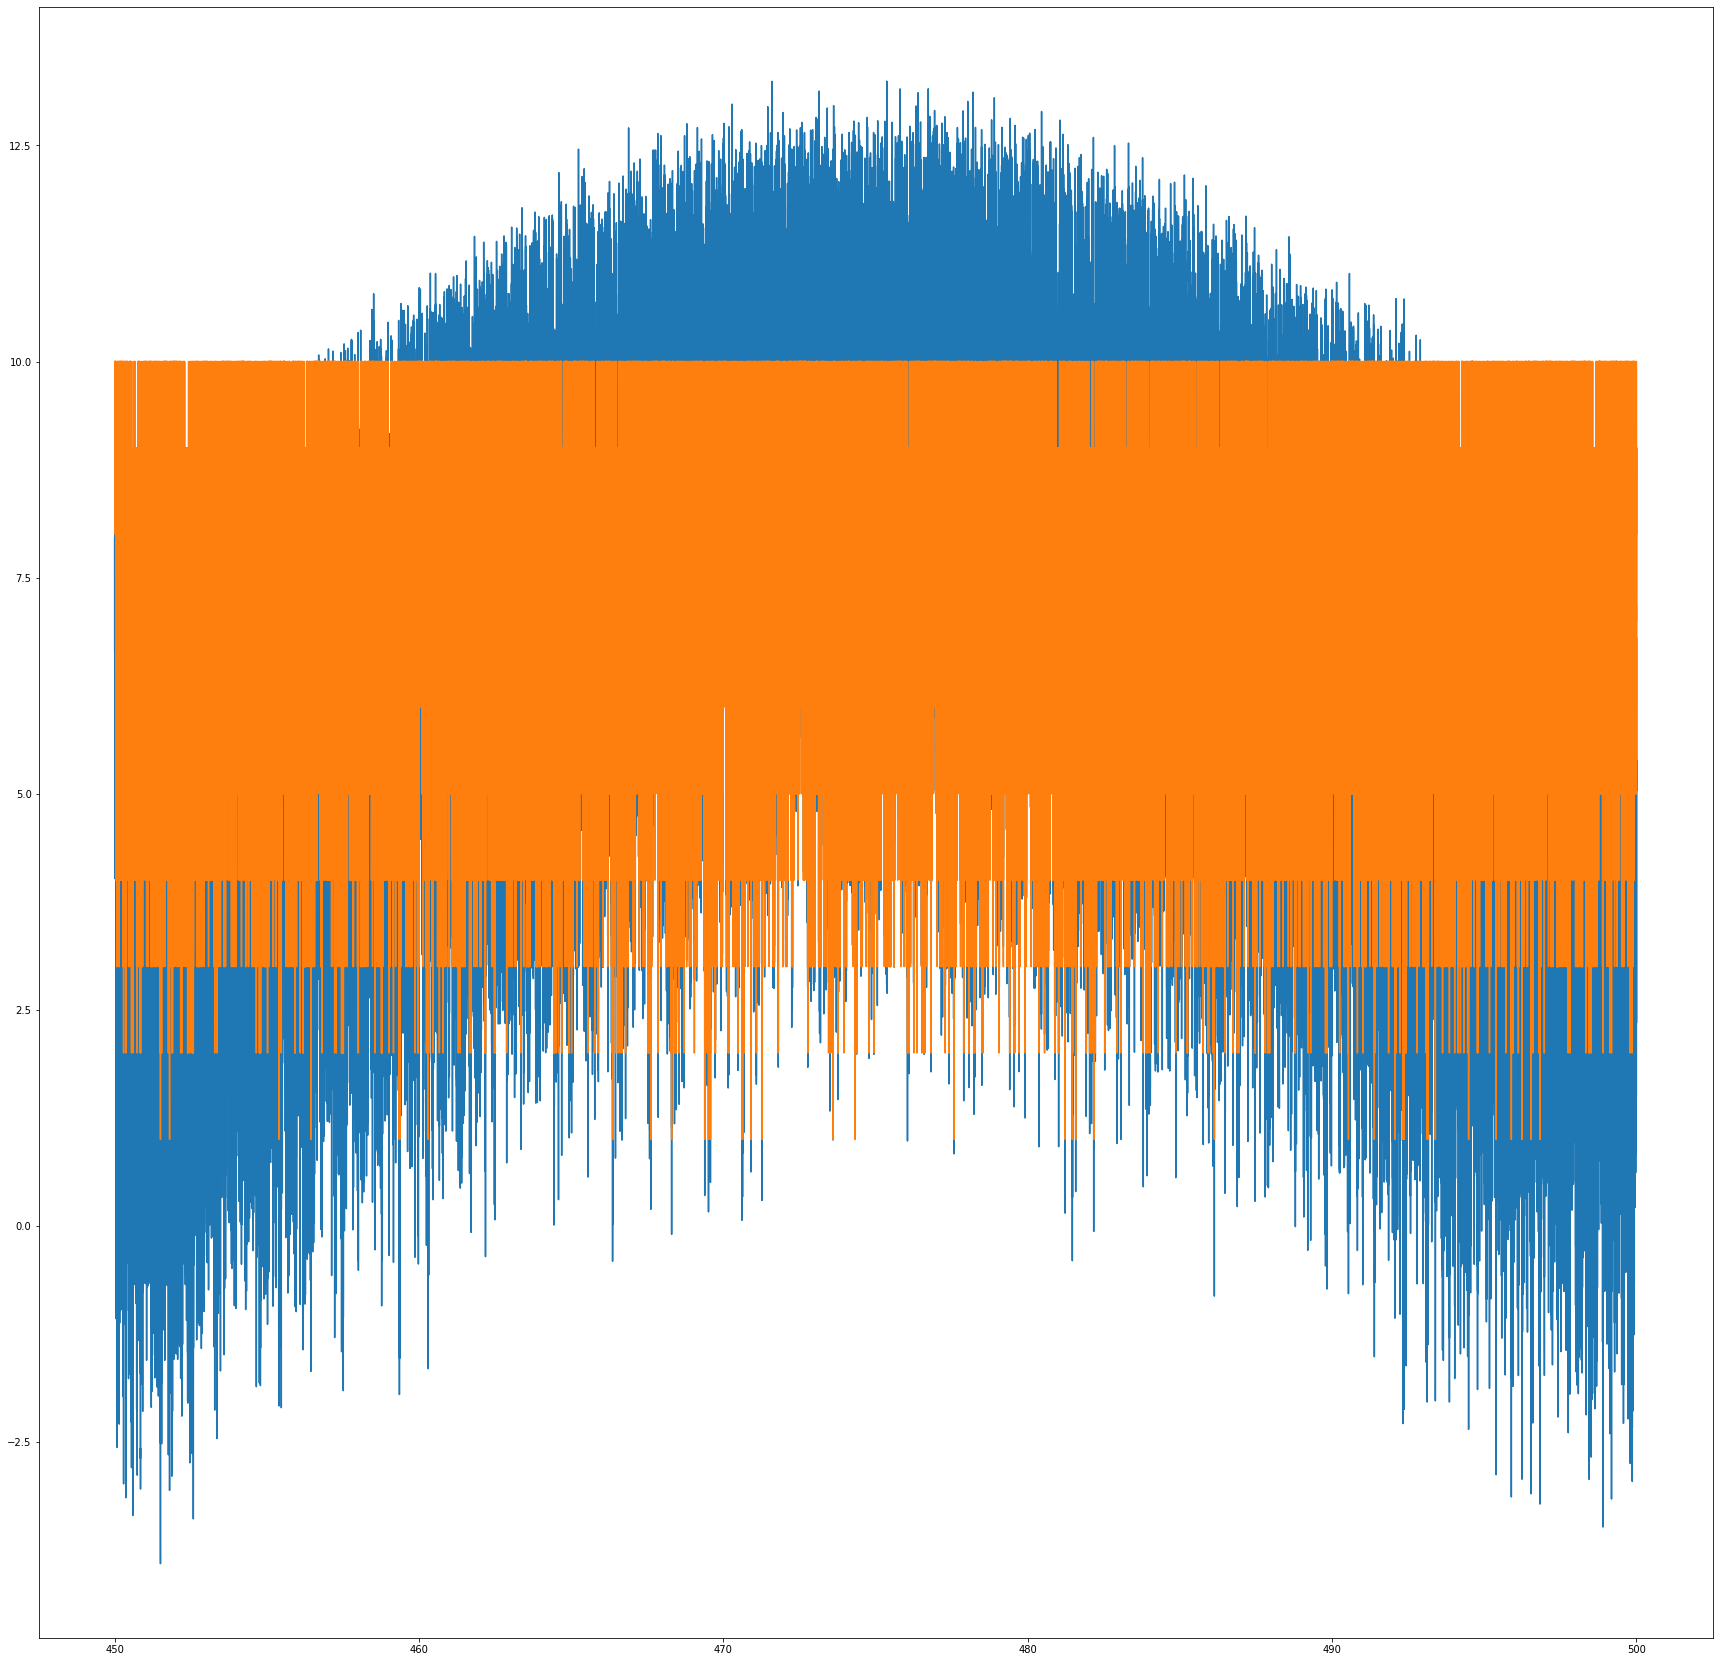

In [50]:
for batch_number in range(10):
    series = df[df.batch == batch_number].signal
    independent = df[df.batch == batch_number].open_channels
    plt.figure(figsize=(30,30))
    plt.plot(series)
    plt.plot(independent)
    plt.show()

The number of ion channels open changes so quickly, it becomes difficult to visualize on the graph due to low resolution. I thought about trying to regraph the series but changing the color of the line so that it correlates with the number of ion channgels open. However, intuition tells me that the linecolour would simply change too quickly to be useful. Let's see what happens.

In [56]:
def plot_colourline(x,c):
    c = cm.jet((c-np.min(c))/(np.max(c)-np.min(c)))
    ax = plt.gca()
    for i in np.arange(len(x)-1):
        ax.plot([x[i],x[i+1]], c=c[i])
    return

"Thank you SO https://stackoverflow.com/questions/36505587/color-line-by-third-variable-python"

'Thank you SO https://stackoverflow.com/questions/36505587/color-line-by-third-variable-python'

for batch_number in range(10):
    series = df[df.batch == batch_number].signal.values
    independent = df[df.batch == batch_number].open_channels.values
    fig = plt.figure(1, figsize=(10,10))
    ax  = fig.add_subplot(111)
    plot_colourline(series,c=independent)
    break
"This code was too resource intesive to produce a graph of even once batch"

Attempting to 'lean out' this code did not work. In any case, it seems smarter to 'zoom in' on a second of the series to see what's really happening.

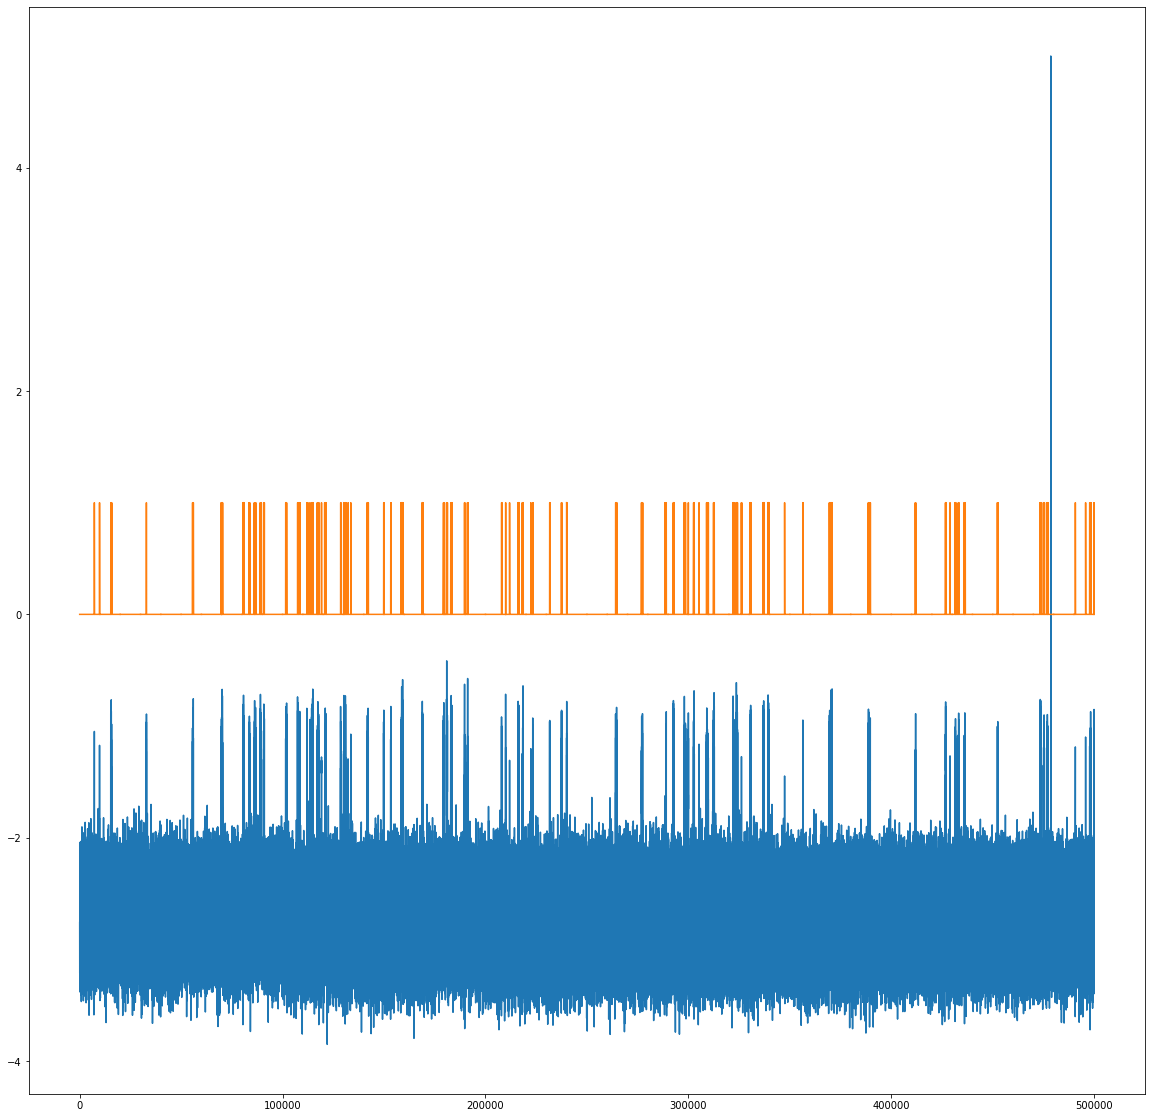

In [15]:
for batch_number in range(10):
    series = df[df.batch == batch_number].signal.values
    independent = df[df.batch == batch_number].open_channels.values
    plt.figure(figsize=(20,20))
    plt.plot(series)
    plt.plot(independent)
    plt.show()
    break

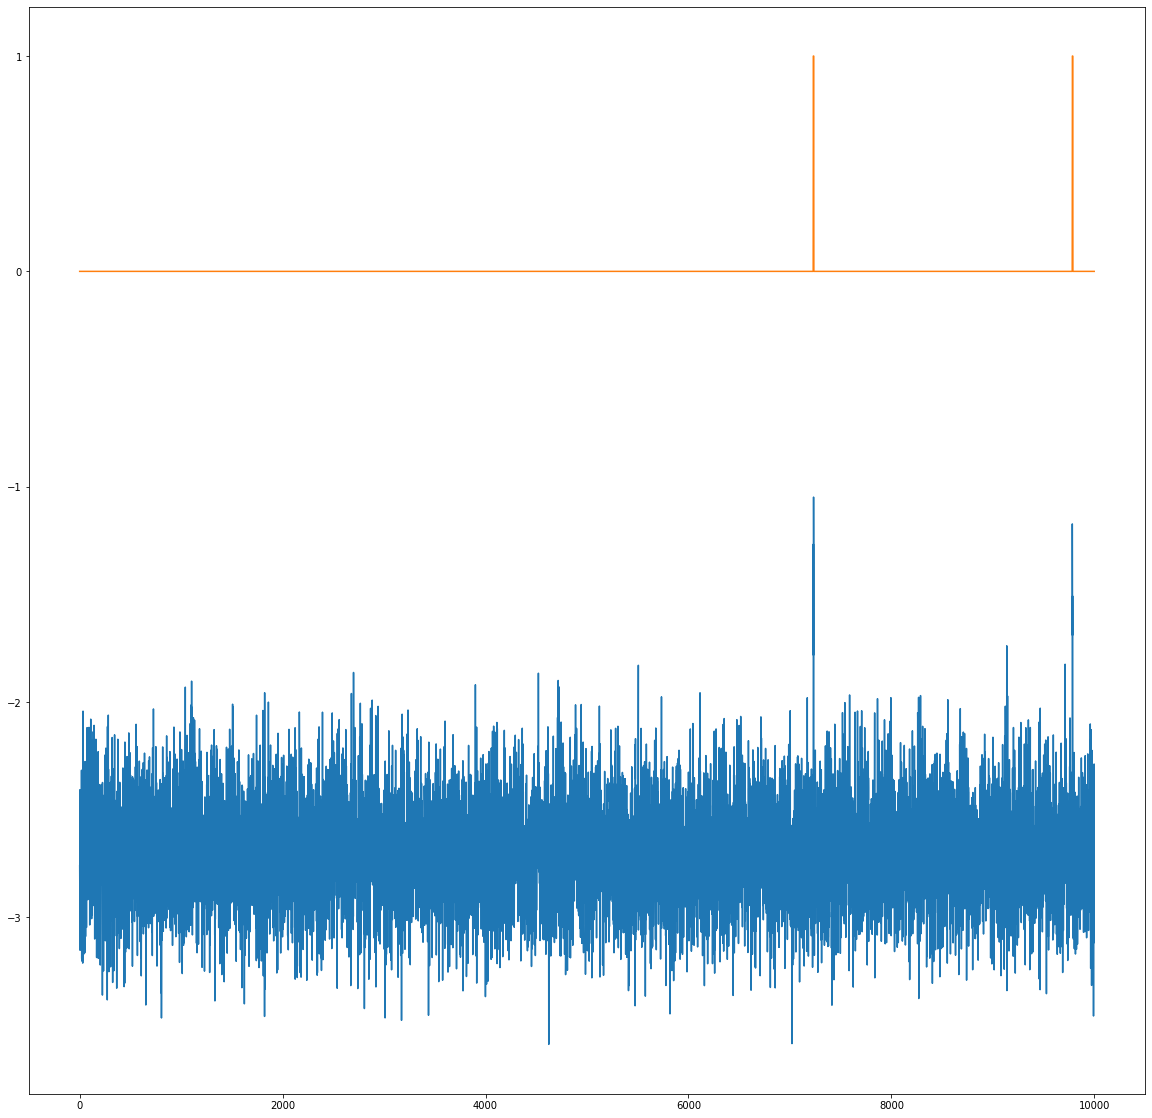

In [13]:
for batch_number in range(10):
    series = df[df.batch == batch_number].signal.values[:10000]
    independent = df[df.batch == batch_number].open_channels.values[:10000]
    plt.figure(figsize=(20,20))
    plt.plot(series)
    plt.plot(independent)
    plt.show()
    break

More zoom please

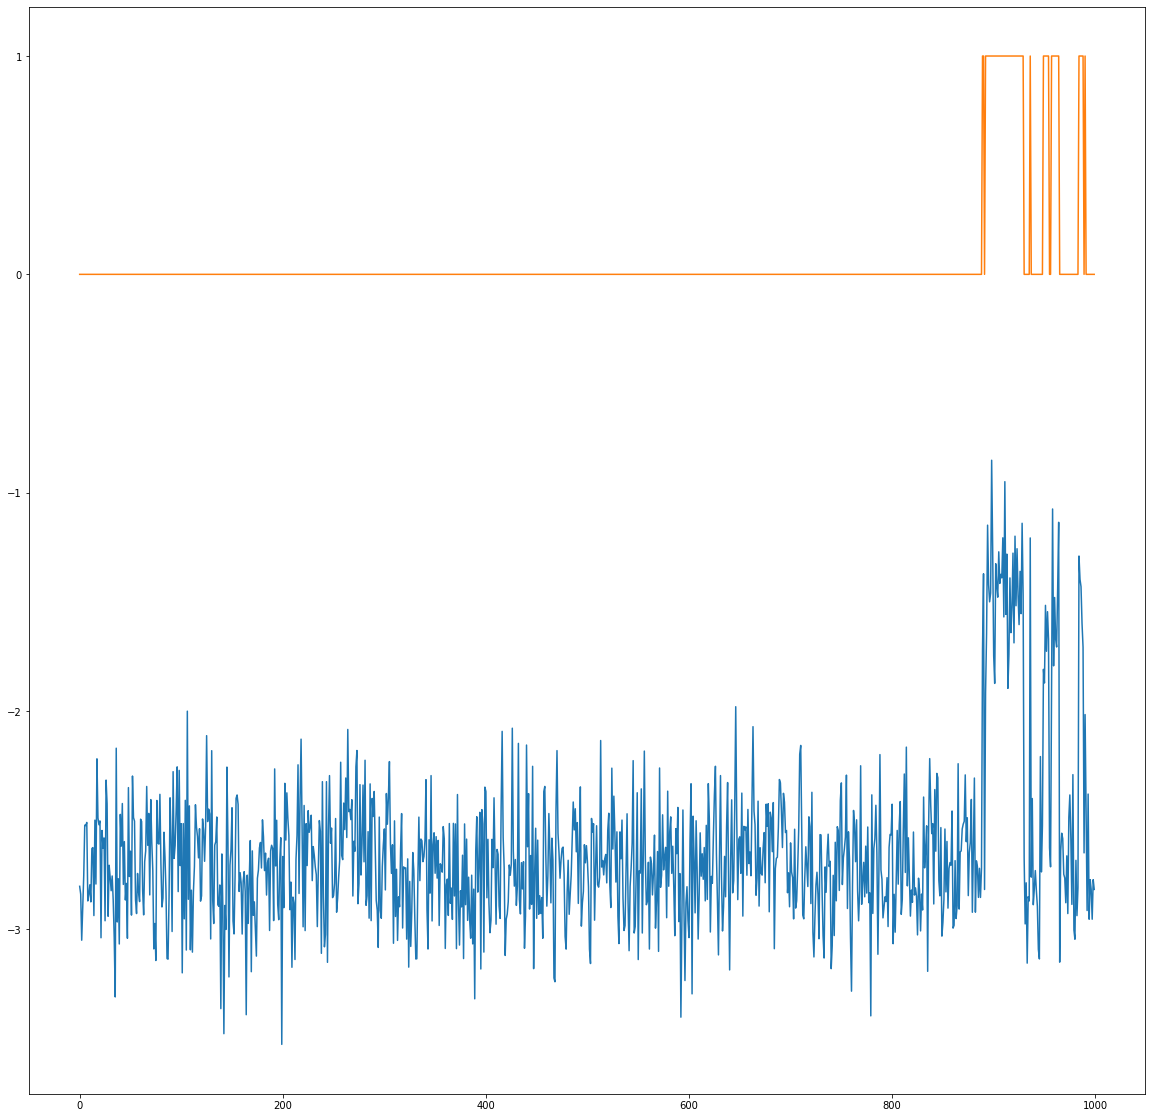

In [16]:
for batch_number in range(10):
    series = df[df.batch == batch_number].signal.values[-1000:]
    independent = df[df.batch == batch_number].open_channels.values[-1000:]
    plt.figure(figsize=(20,20))
    plt.plot(series)
    plt.plot(independent)
    plt.show()
    break

Even more

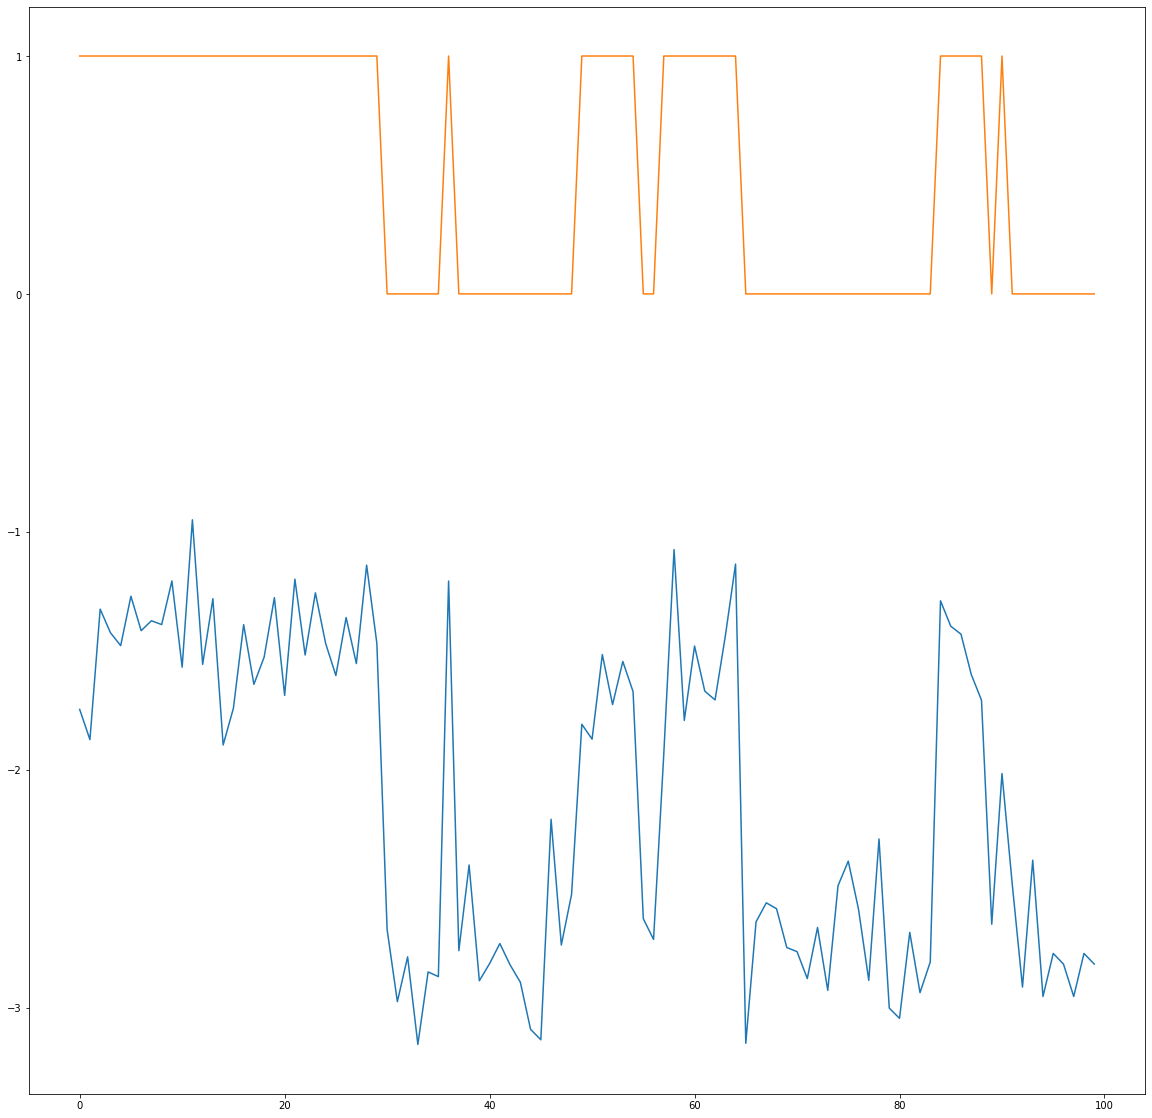

In [18]:
for batch_number in range(10):
    series = df[df.batch == batch_number].signal.values[-100:]
    independent = df[df.batch == batch_number].open_channels.values[-100:]
    plt.figure(figsize=(20,20))
    plt.plot(series)
    plt.plot(independent)
    plt.show()
    break

Now we're starting to see the picture of what's really happening. When the signal is high, more channels are likely to be open. This visualization makes me think that the data would benefit from some smoothing'. Firstly let's see if we can design code to show us random 'windows' of the data up close. Given that we are seeing 1000 values here and the sample rate is 10000, that indicates that 0.1s is a good window to see the data intuitively.

Firstly I'll slightly modify the code to preserve the true time.

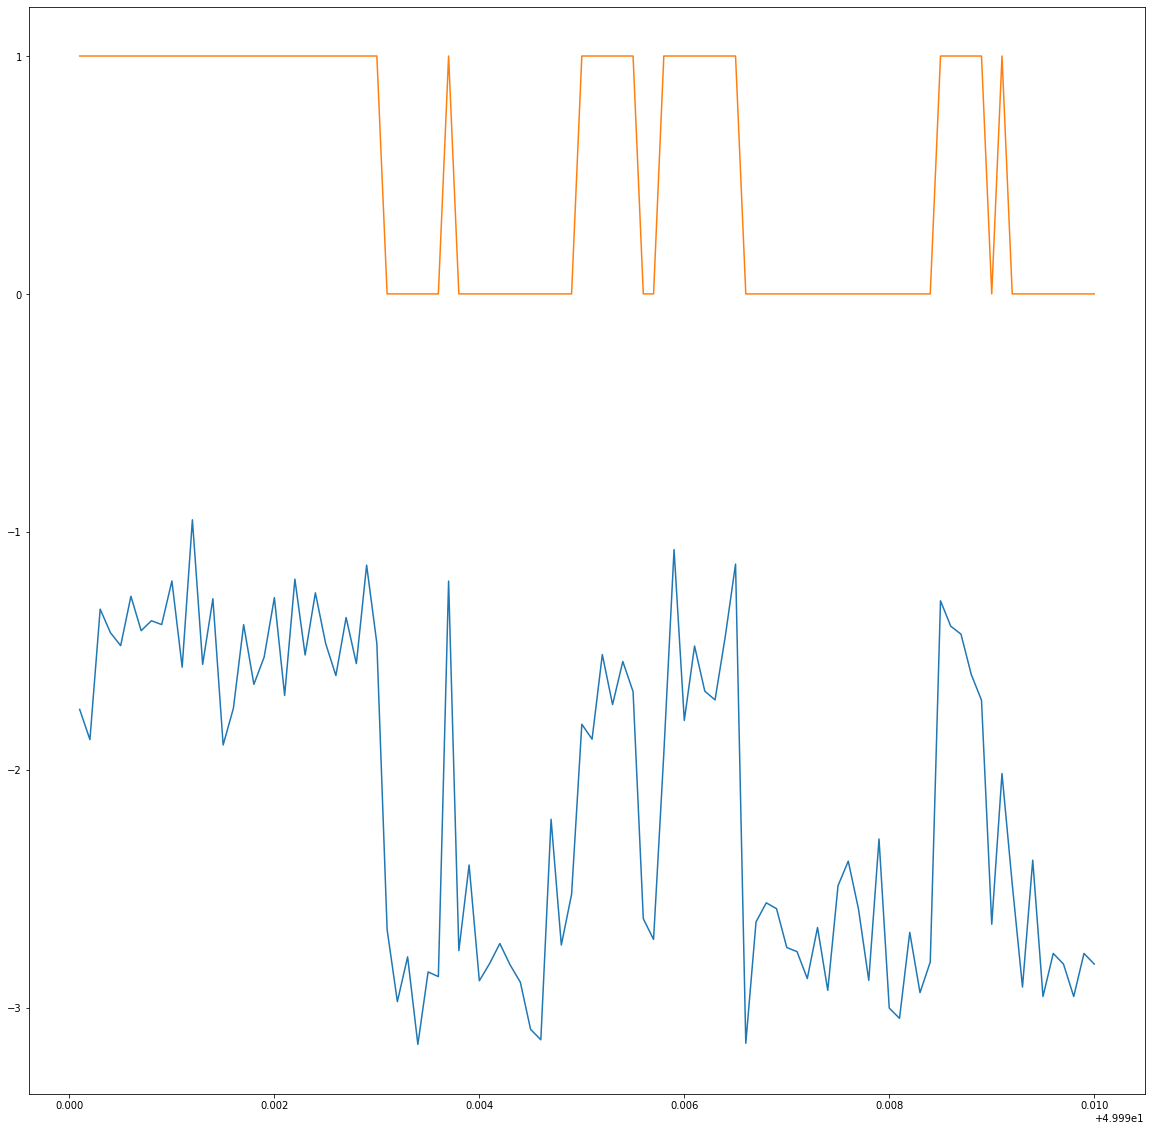

In [20]:
for batch_number in range(10):
    series = df[df.batch == batch_number].signal.iloc[-100:]
    independent = df[df.batch == batch_number].open_channels.iloc[-100:]
    plt.figure(figsize=(20,20))
    plt.plot(series)
    plt.plot(independent)
    plt.show()
    break

Now I'll modify the code to select a random 'window' of length = window_size to display.

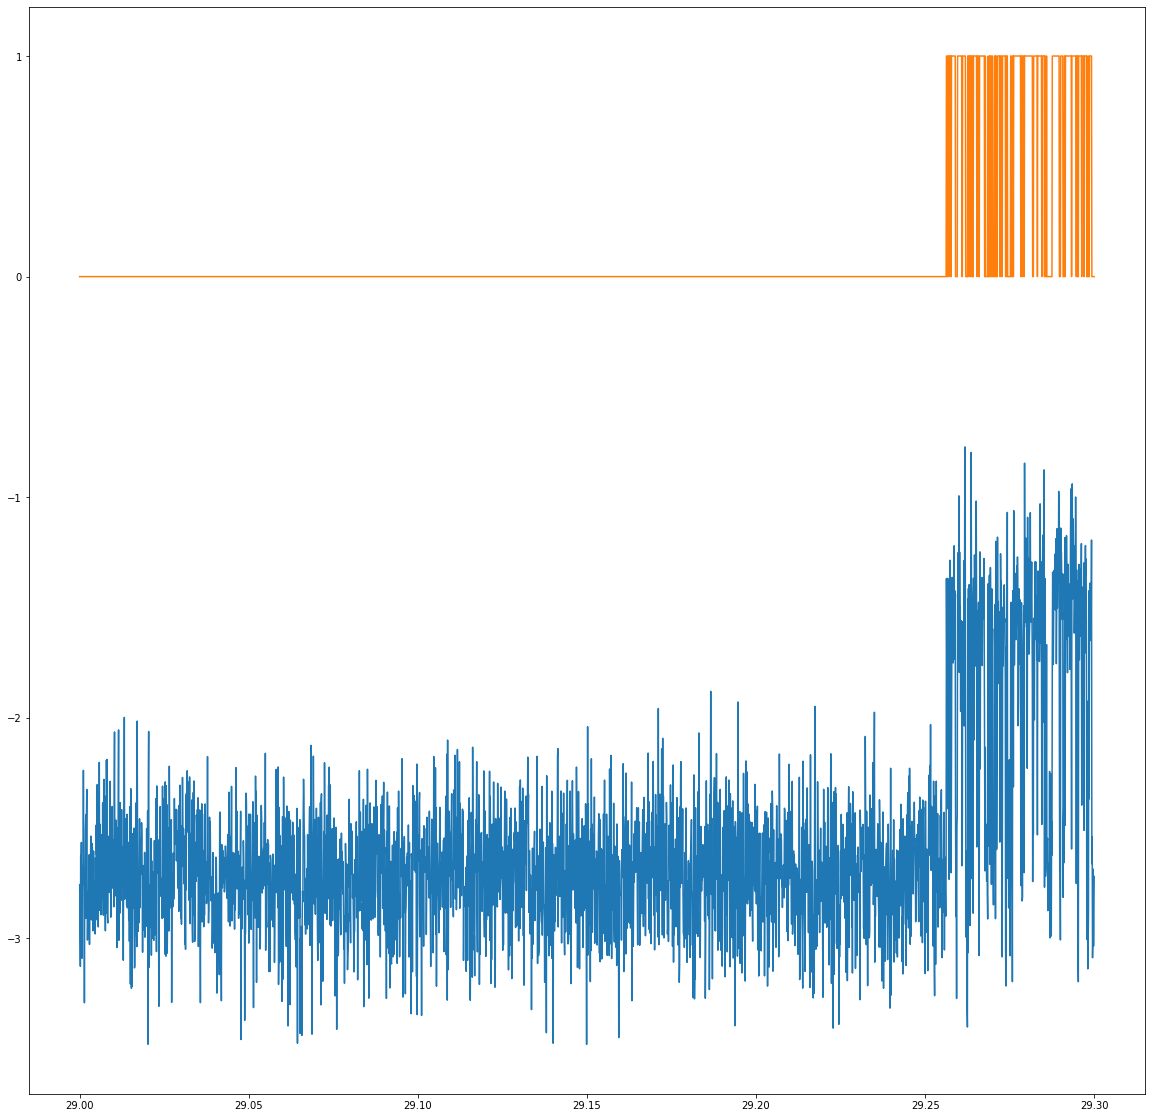

In [31]:
window_size = 0.3
for batch_number in range(10):
    length = len(df[df.batch == batch_number])
    start_idx = df[df.batch == batch_number].index.values[0]
    end_idx = df[df.batch == batch_number].index.values[-1]
    window_start = np.random.randint(start_idx, end_idx-window_size)
    
    series = df[df.batch == batch_number].signal.loc[window_start:window_start+window_size]
    independent = df[df.batch == batch_number].open_channels.loc[window_start:window_start+window_size]
    plt.figure(figsize=(20,20))
    plt.plot(series)
    plt.plot(independent)
    plt.show()
    break

Let's see what happens when I smooth the signal graph out

In [37]:
import statsmodels.api as sm

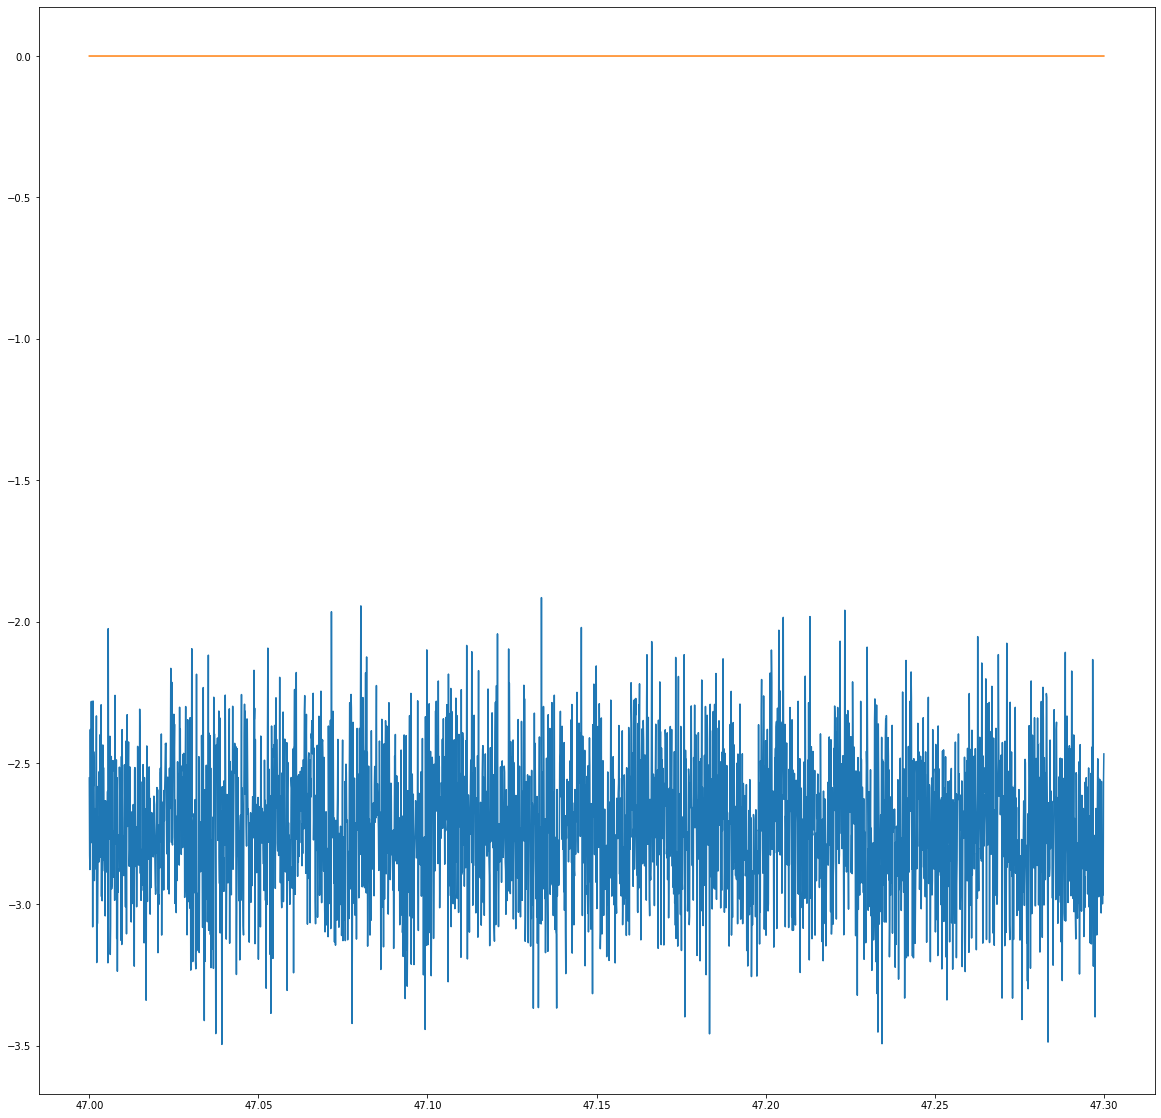

In [45]:
window_size = 0.3
batch_number = 0
window_smooth_size = 0.001

length = len(df[df.batch == batch_number])
start_idx = df[df.batch == batch_number].index.values[0]
end_idx = df[df.batch == batch_number].index.values[-1]
window_start = np.random.randint(start_idx, end_idx-window_size)

series = df[df.batch == batch_number].signal.loc[window_start:window_start+window_size]
independent = df[df.batch == batch_number].open_channels.loc[window_start:window_start+window_size]
plt.figure(figsize=(20,20))
plt.plot(series)
#lowess = sm.nonparametric.lowess(series, series.index.values,frac=0.001)
#plt.plot(lowess)


plt.plot(independent)
plt.show()




In [ ]:
batches = int(500/50)
seconds_in_batch = 50
freq = 10000

X = []
y = []

for batch_number in range(batches):
    
    window_size_1 = 0.001
    batch_df = df[df.batch == batch_number]
    indices = batch_df.index.values







    for index in indices:
        window_df = batch_df.loc[index-window_size/2:index+window_size/2]
        open_channels = window_df.loc[index].open_channels
        features = window_df.signal.values

        if len(features) <= int(window_size*10000):

            padding = np.ones((int(window_size*10000)-len(features))+1)*features.mean()
            features = np.append(features,padding)

        X.append(features)
        y.append(open_channels)


X_copy = X
X = np.array(X)

y_copy = y
y = np.array(y)

In [71]:
batch_number

9

In [70]:
X.shape

(5000000, 11)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.20, random_state=42)

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

preds_val = clf.predict(X_val)

print((preds_val == y_val).mean())

from sklearn.metrics import f1_score

print(f1_score(y_val, preds_val, average='macro'))

preds_test = clf.predict(X_test)
print(f1_score(y_test, preds_test, average='macro'))

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The above approach is remarkably unsuccessful. I assume that I am supposed to take the general trend of the signal into account. Where the signal has high average values, high signal values do not necessarily indicate that there are many open channels. It is only when the signal is significantly above baseline that it indicates channels are open.

In [54]:
batches = int(df_terminus/50)
seconds_in_batch = 50
freq = 10000

X = None
y = None 

for batch_number in range(batches):
    print('batch_number is: ', batch_number)
    
    window_size_1 = 0.001
    window_size_2 = 0.01
    window_size_3 = 0.1
    window_size_4 = 1
    window_size_5 = 10
    
    indices = df[df.batch == batch_number].index.values

    for index in indices:

            
        # This section looks at the local range of values, to the general range of values in
        # the area of our signal.
        
        
        open_channels = np.array(df.loc[index].open_channels)
        features_1 = df.loc[index-window_size_1/2:index+window_size_1/2].signal.values
        feature_2 = df.loc[index-window_size_2/2:index+window_size_2/2].signal.values.mean()
        feature_3 = df.loc[index-window_size_3/2:index+window_size_3/2].signal.values.mean()
        feature_4 = df.loc[index-window_size_4/2:index+window_size_4/2].signal.values.mean()
        feature_5 = df.loc[index-window_size_5/2:index+window_size_5/2].signal.values.mean()

        
        if len(features_1) <= int(window_size_1*10000):
            padding_1 = np.ones((int(window_size_1*10000)-len(features_1))+1)*features_1.mean()
            features_1 = np.append(features_1,padding_1)
            
            
        features = np.concatenate((features_1,feature_2,feature_3,feature_4,feature_5),axis=None)
        if index % 1 ==0:
            print(index)
        
        if X is None:
            X = features
        else:
            X = np.concatenate((X,features),axis=0)
            
        if y is None:
            print('y is none')
            y = open_channels
        else:
            y = np.concatenate((y,open_channels),axis=None)
                
        if index % 1 == 0:
            print(index)
            print(features)
    
    break

X_copy = X
X = np.array(X)

y_copy = y
y = np.array(y)

batch_number is:  0
y is none
1.0
1.0
[-3.1189     -2.7026     -2.7367     -2.771      -2.2876     -2.7107
 -2.9971     -2.7052     -2.7499     -2.9634     -2.77431    -2.72533564
 -2.69133007 -2.69675562 -2.6854712  -2.73078812 -2.69115834 -2.69673837
 -2.68546802]
2.0
2.0
[-2.567      -2.9309     -2.7295     -2.3145     -2.4913     -2.672
 -2.4786     -2.2426     -3.0029     -2.5963     -2.60256    -2.656544
 -2.69136004 -2.66484911 -2.68373725 -2.657346   -2.6915991  -2.66484778
 -2.68374043 -2.663645   -2.69145854 -2.66478489 -2.68374108 -2.666841
 -2.69104895 -2.66484154 -2.68374113 -2.669466   -2.69104915 -2.66477522
 -2.6837418  -2.663776   -2.69087582 -2.66483227 -2.68374306 -2.66383168
 -2.6906037  -2.6648338  -2.68374175]


KeyboardInterrupt: 

'The above approach is computationally very intensive and probably not worth the processing power. Finding the 
regional means is probably no better than removing the 'baseline' variation from the series'

In [59]:
len(df.signal)

5000000

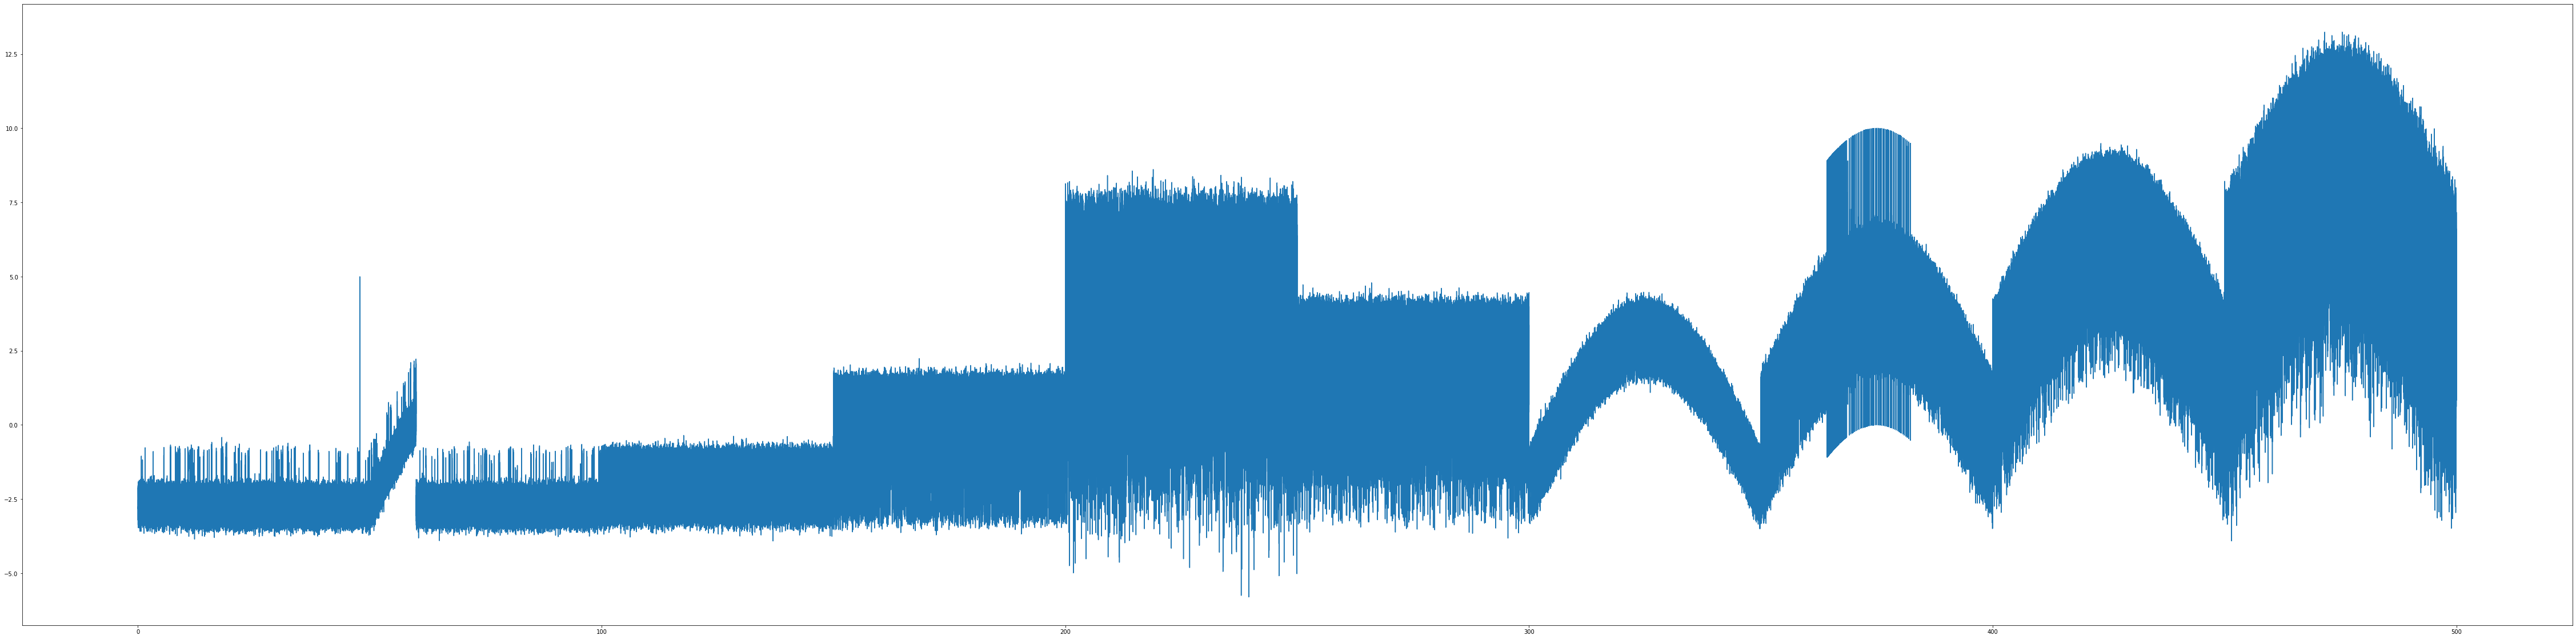

In [63]:
series = df.signal
plt.figure(figsize= (80,20))
plt.plot(series[:1000])


Now I can see the general trend of the ten batches. Each has it's 'baseline' which underlies the signal of the channels open. I need to adjust each part of the signal to 'sit on the baseline' (I will try to make the baseline 0 in all cases). If I get better predictions after bringing each signal down to it's 'baseline' then I know I am on the right track.

In [64]:
# Let's try to bring the signal down to baseline.

import numpy as np
from scipy import sparse
from scipy.sparse.linalg import spsolve

def baseline_als(y, lam, p, niter=10):
  L = len(y)
  D = sparse.diags([1,-2,1],[0,-1,-2], shape=(L,L-2))
  w = np.ones(L)
  for i in range(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lam * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)
  return z

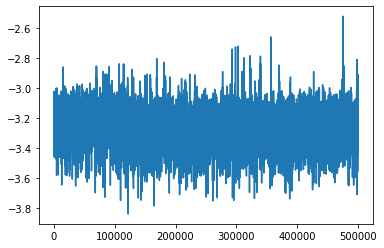

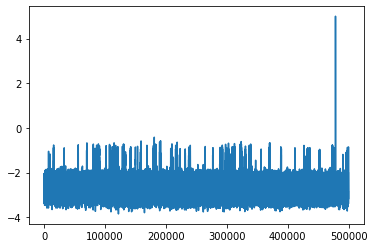

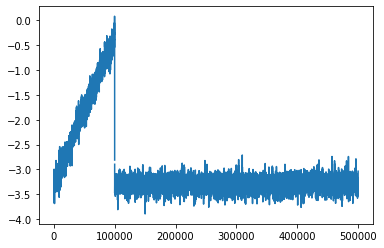

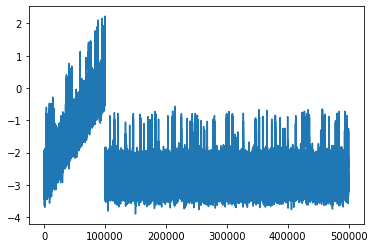

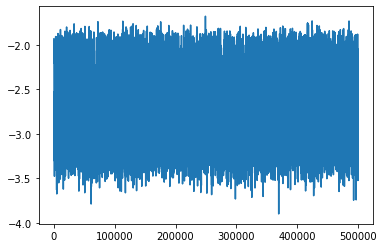

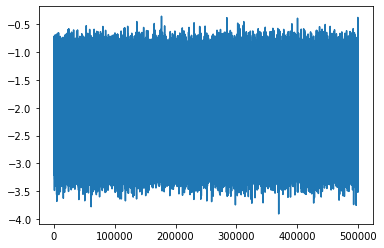

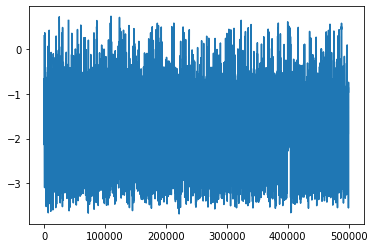

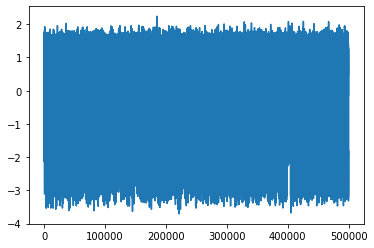

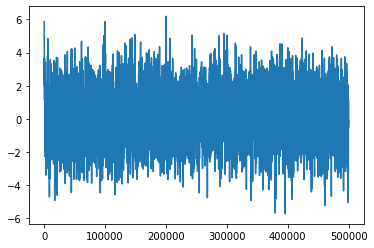

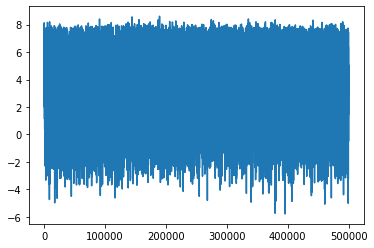

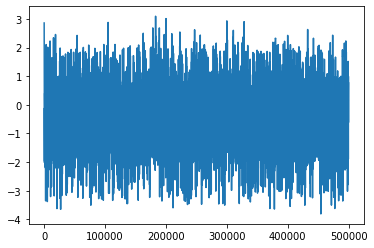

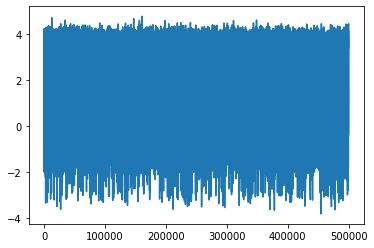

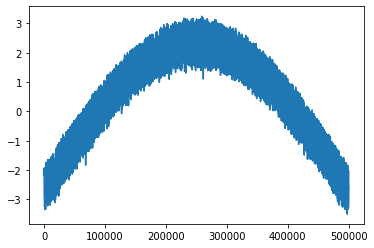

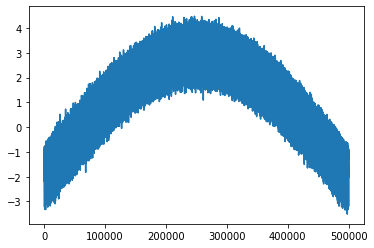

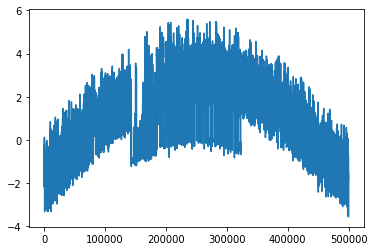

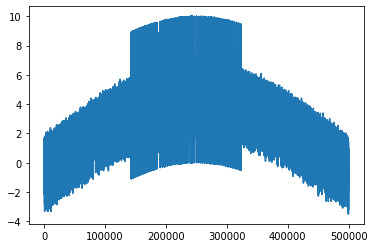

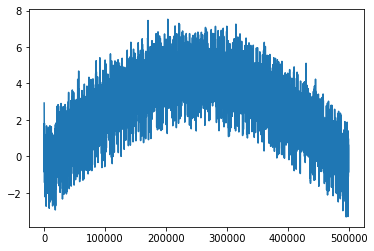

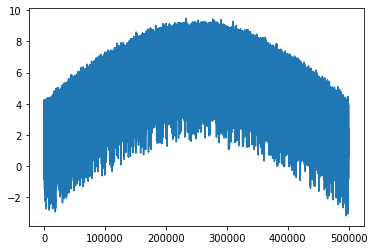

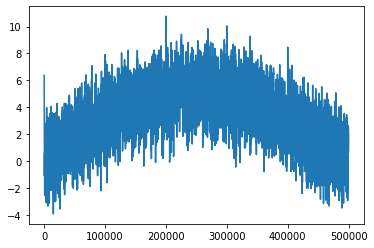

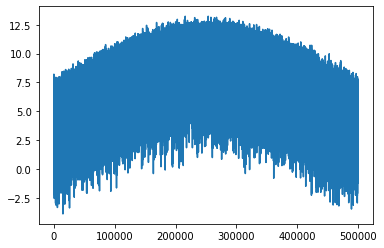

In [97]:
for batch_number in range(10):

    y = df[df.batch == batch_number].signal.values

    baseline_series = baseline_als(y, lam=10**2, p=0.0001, niter=10)


    #plt.figure(figsize= (80,20))
    plt.plot(baseline_series)
    plt.show()
    plt.plot(y)
    plt.show()
    

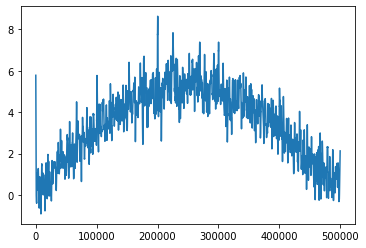

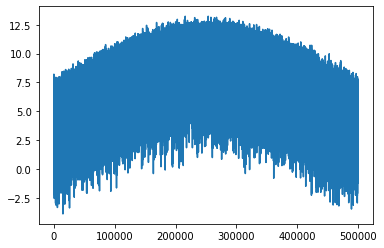

In [104]:
batch_number = 9

y = df[df.batch == batch_number].signal.values

baseline_series = baseline_als(y, lam=10**8, p=0.01, niter=10)


#plt.figure(figsize= (80,20))
plt.plot(baseline_series)
plt.show()
plt.plot(y)
plt.show()
    

This really isn't working... I can't seem to 'stick' the signal down onto the baseline. Perhaps at this point it's better to play to my strengths - Neural Networks. In that case, I have a lot of faith that I can assemble a set of features that capture this 'above baseline' behaviour.

My hypothesis is that the features should be arranged so that feature 0 is the signal corresponding to an open channels integer at a point in time. Feature 1 should be another signal close in time. Feature 2 should be the next closest feature in time. Then feature 3, 4 etc. However, at a total of 11 closest features (established before as a great predictive set), the additional features should be signals picked up at a distance in time according to a certain increasing function.

So our old code to create padding is still good.

In [120]:
batches = int(500/50)
seconds_in_batch = 50
freq = 10000

X = None
y = []

for batch_number in range(batches):
    
    window_size = 0.001
    batch_df = df[df.batch == batch_number]
    indices = batch_df.index.values

    i = 0
    for index in indices:
        if index %1 ==0:
            print(index)
        window_df = batch_df.loc[index-window_size/2:index+window_size/2]
        open_channels = window_df.loc[index].open_channels
        features = window_df.signal.values
        
        print(len(features))
        
        if len(features) <= int(window_size*10000):
            print(padding)
            padding = np.ones((int(window_size*10000)-len(features))+1)*features.mean()
            features = np.append(features,padding)
        
        
        if X is None:
            X = features
        else:
            X = np.concatenate((X, features), axis = 0)

        y.append(open_channels)
        i+=1
        if i == 10:
            break
    break
y = np.array(y)

6
[-2.76966]
7
[-2.8263 -2.8263 -2.8263 -2.8263 -2.8263]
7
[-2.80815714 -2.80815714 -2.80815714 -2.80815714]
9
[-2.80815714 -2.80815714 -2.80815714 -2.80815714]
10
[-2.76875556 -2.76875556]
10
[-2.76774]
11
10
[-2.76774]
11
11


This code is really confusing. Sometimes the values need padding in the middle and sometimes they don't. I think there's a problem with the pandas library. If I'm going to construct the feature that I want, I'm going to have to do it ALL in numpy for speed.

In [121]:
batch_0_series = df[df.batch ==0].signal.values

In [122]:
len(batch_0_series)

500000

In [123]:
batch_0_series[:100]

array([-2.76  , -2.8557, -2.4074, -3.1404, -3.1525, -2.6418, -2.6993,
       -2.5935, -2.6682, -2.7586, -3.1136, -2.6221, -2.7316, -2.9028,
       -2.7736, -2.9272, -2.924 , -2.7019, -2.3167, -2.9907, -3.1911,
       -3.0463, -2.8575, -3.203 , -2.5574, -2.9488, -2.8751, -3.2013,
       -2.6669, -2.7794, -3.2121, -2.7965, -2.402 , -2.0421, -2.8659,
       -2.9225, -2.7988, -2.8778, -3.0971, -2.8668, -2.5531, -2.7646,
       -2.7242, -3.026 , -3.0769, -2.9315, -3.1685, -2.7249, -2.4162,
       -2.7354, -2.8812, -3.1624, -2.608 , -2.2762, -2.4956, -2.5151,
       -2.8543, -2.5056, -3.0884, -2.5372, -2.8604, -2.4998, -2.935 ,
       -2.6578, -2.6164, -2.5951, -2.354 , -3.0463, -2.4399, -2.6532,
       -2.484 , -2.487 , -2.6694, -2.1188, -2.7364, -2.5252, -2.7962,
       -2.709 , -2.4718, -2.9031, -2.9178, -2.4713, -2.8259, -2.491 ,
       -2.9054, -2.4954, -2.5722, -2.7969, -2.6126, -2.6251, -2.7582,
       -2.6152, -2.1176, -2.6256, -2.4614, -2.8807, -2.3198, -2.3857,
       -2.9248, -3.0

In [126]:
# I'll try to use the golden ratio to construct the features of x.
golden = (1 + 5 ** 0.5) / 2

So let's take the very middle value of batch_0_series and see if we can construct a feature vector for it

In [129]:
index = int(len(batch_0_series)/2)

In [128]:
batch_0_series[int(len(batch_0_series)/2)]

-2.4442

So the signals around it (I find using a window size of 0.0011 is good, which means 0.0011*10000 = 11 values)

In [132]:
batch_0_series[index-5:index+6]

array([-2.8587, -2.7153, -2.6993, -2.3315, -2.5854, -2.4442, -2.1907,
       -2.8017, -2.5989, -2.4814, -3.1729])

Great, so -2.4442 is the very middle feature. That's fine for now. So now I want to add features that represent the gist of the rest of the series.

In [143]:
def gr

direction = 1
signals = []
for distance in [5*golden**i for i in range(25)]:
    print(distance)
    try:
        signal_picked = batch_0_series[int(index - direction*distance)]
        print(signal_picked)
        direction *= -1
        signals.append(signal_picked)
    except:
        try:
            direction *= -1
            signal_picked = batch_0_series[index - direction*distance]
            signals.append(signal_picked)
        except:
            break
            
    
    

5.0
-2.8587
8.090169943749475
-3.011
13.090169943749475
-2.6498
21.18033988749895
-2.4301
34.270509831248425
-2.8091
55.45084971874738
-2.5999
89.72135954999581
-2.6859
145.1722092687432
-2.558
234.89356881873903
-2.8708
380.0657780874823
-3.0988
614.9593469062213
-2.8192
995.0251249937036
-2.3297
1609.984471899925
-2.5241
2605.0095968936284
-2.139
4214.994068793554
-3.3044
6820.003665687183
-2.5272
11034.997734480738
-2.7379
17855.001400167923
-2.998
28889.99913464866
-3.2587
46745.00053481658
-2.5702
75634.99966946524
-2.9045
122380.00020428182
-2.5153
198014.99987374706
-2.6837
320395.00007802894


In [145]:
len(signals)

23